# Analysis of COVID-19 Data from The New York Times

*Author: Mark Bauer*  
*Date: March 28, 2020*

The New York Times Github Data [Repository](https://github.com/nytimes/covid-19-data).   
The New York Time [News Article](https://www.nytimes.com/article/coronavirus-county-data-us.html).  
The New York Times COVID-19 US Map: https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html.   
The New York Times COVID-19 Global Map: https://www.nytimes.com/interactive/2020/world/coronavirus-maps.html.

In [1]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter
import matplotlib.dates as dates
import seaborn as sns
import geopandas as gpd
import zipfile
from zipfile import ZipFile
from io import BytesIO
import os
import zipfile
from zipfile import ZipFile
from os.path import basename
import requests
import urllib
import squarify  

# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark
%watermark -v -p numpy,pandas,matplotlib,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.2.0

numpy 1.16.1
pandas 1.0.0
matplotlib 3.0.2
matplotlib.pyplot 3.0.2
seaborn 0.9.0


In [3]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'

covid_19_state_data = pd.read_csv(url)

In [4]:
covid_19_state_data.head(10)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
5,2020-01-25,California,6,1,0
6,2020-01-25,Illinois,17,1,0
7,2020-01-25,Washington,53,1,0
8,2020-01-26,Arizona,4,1,0
9,2020-01-26,California,6,2,0


In [5]:
table = covid_19_state_data.sort_values(by=['date', 'cases'], 
                                ascending=[False, False]).drop_duplicates(subset ="state", 
                                keep = 'first').reset_index(drop=True).head(10)

table['cases'] = table['cases'].map('{:,}'.format)
table['deaths'] = table['deaths'].map('{:,}'.format)
table.drop('fips', axis=1, inplace=True)
                 
print(table.to_markdown())

|    | date       | state         | cases   | deaths   |
|---:|:-----------|:--------------|:--------|:---------|
|  0 | 2020-04-02 | New York      | 92,770  | 2,653    |
|  1 | 2020-04-02 | New Jersey    | 25,590  | 539      |
|  2 | 2020-04-02 | California    | 10,995  | 243      |
|  3 | 2020-04-02 | Michigan      | 10,791  | 417      |
|  4 | 2020-04-02 | Louisiana     | 9,150   | 310      |
|  5 | 2020-04-02 | Florida       | 9,000   | 144      |
|  6 | 2020-04-02 | Massachusetts | 8,966   | 154      |
|  7 | 2020-04-02 | Illinois      | 7,695   | 165      |
|  8 | 2020-04-02 | Pennsylvania  | 7,016   | 90       |
|  9 | 2020-04-02 | Washington    | 6,585   | 300      |


In [6]:
covid_19_state_data.shape

(1719, 5)

In [7]:
print('New York Times COVID-19 data as of', covid_19_state_data.sort_values(by='date', 
                                   ascending=False)['date'].iloc[0])

New York Times COVID-19 data as of 2020-04-02


In [8]:
current_date = covid_19_state_data.sort_values(by='date', ascending=False)['date'].iloc[0]

In [9]:
print('The current date of this notebook is', current_date)

The current date of this notebook is 2020-04-02


In [10]:
covid_19_state_data.date = pd.to_datetime(covid_19_state_data.date, infer_datetime_format=True)

In [11]:
covid_19_state_data.dtypes

date      datetime64[ns]
state             object
fips               int64
cases              int64
deaths             int64
dtype: object

In [12]:
drop_duplicates_ts = covid_19_state_data.sort_values(by="cases", ascending=False).drop_duplicates(
                                                    subset ="state", keep = 'first')
top_10 = drop_duplicates_ts[0:10]
top10_list = list(top_10.state)
top_10_ts  = covid_19_state_data.loc[covid_19_state_data['state'].isin(top10_list)]

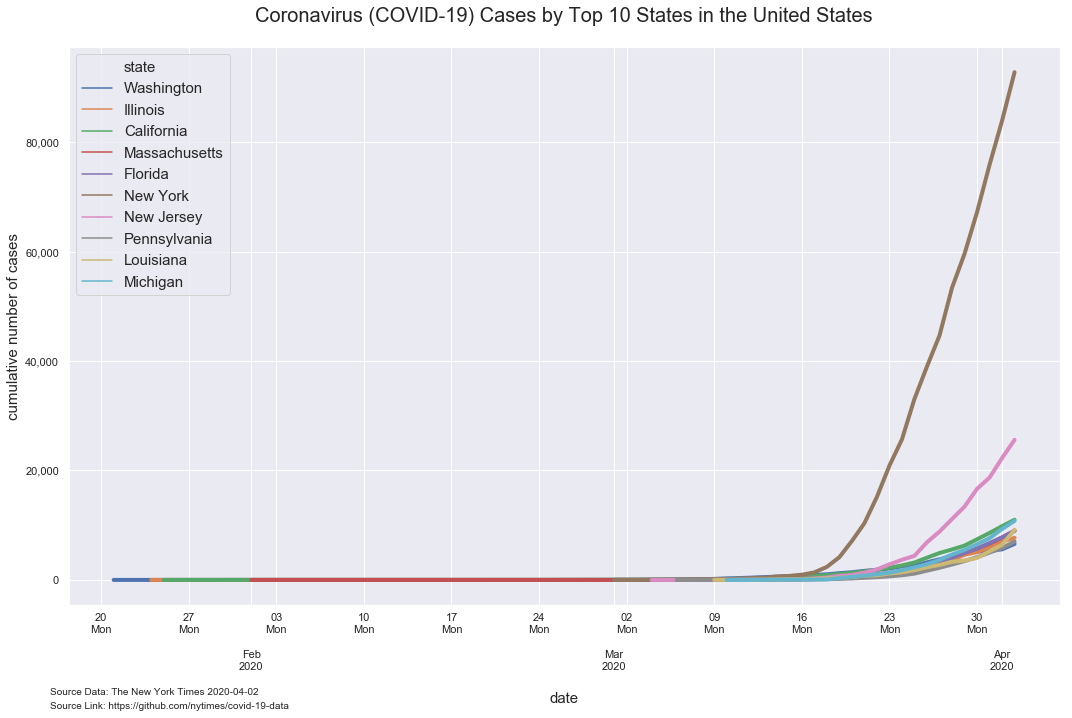

In [13]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="date", y="cases",
             hue="state",
             data=top_10_ts, linewidth=4)

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('date', fontsize=15)
ax1.set_ylabel('cumulative number of cases', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Top 10 States in the United States', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries')

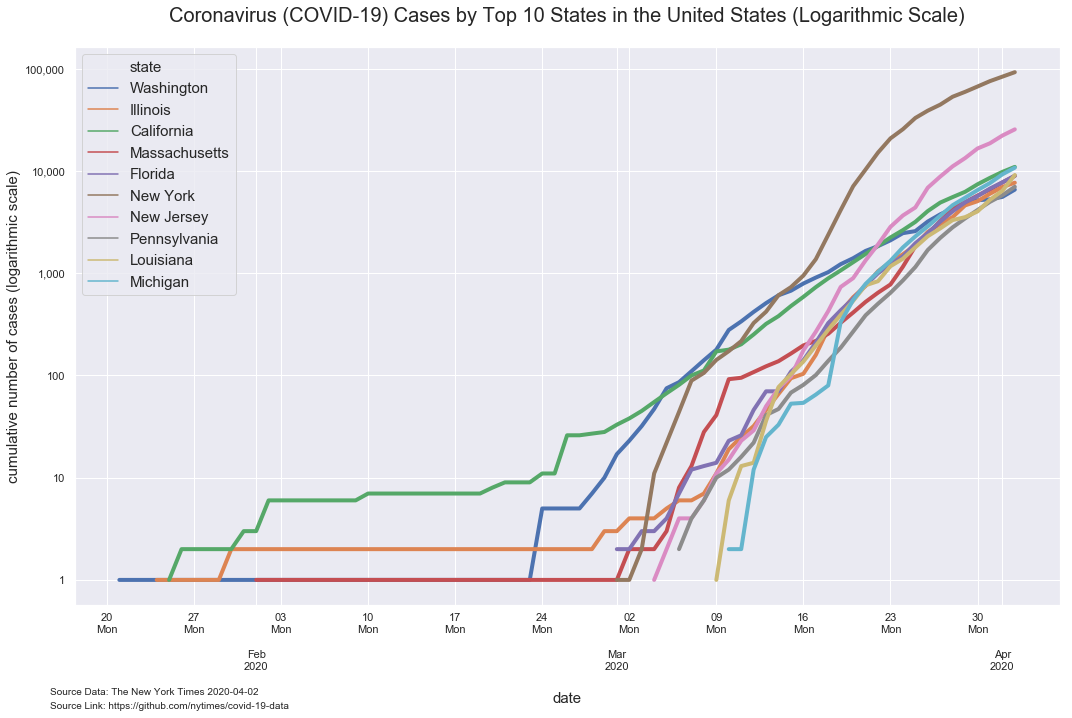

In [14]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="date", y="cases",
             hue="state",
             data=top_10_ts, linewidth=4)
ax1.set_yscale('log')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.labelpad = 20

ax1.grid(True)
ax1.grid(axis='x', which='minor')

ax1.legend(fontsize=15)
ax1.set_xlabel('date', fontsize=15)
ax1.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Top 10 States in the United States (Logarithmic Scale)', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-log')

In [15]:
state_first_case = top_10_ts.sort_values(by=['date', 'cases'], 
                                         ascending=[True, True]).drop_duplicates(subset ="state", 
                                         keep = 'first').reset_index(drop=True)

In [16]:
state_first_case = state_first_case[['date', 'state']]
state_first_case.rename(columns={'date': 'date_first_case'}, inplace=True)

In [17]:
state_first_case

,date_first_case,state
0,2020-01-21,Washington
1,2020-01-24,Illinois
2,2020-01-25,California
3,2020-02-01,Massachusetts
4,2020-03-01,New York
5,2020-03-01,Florida
6,2020-03-04,New Jersey
7,2020-03-06,Pennsylvania
8,2020-03-09,Louisiana
9,2020-03-10,Michigan


In [18]:
state_first_case = top_10_ts.merge(state_first_case, left_on='state', right_on='state')

In [19]:
state_first_case

,date,state,fips,cases,deaths,date_first_case
0,2020-01-21,Washington,53,1,0,2020-01-21
1,2020-01-22,Washington,53,1,0,2020-01-21
2,2020-01-23,Washington,53,1,0,2020-01-21
3,2020-01-24,Washington,53,1,0,2020-01-21
4,2020-01-25,Washington,53,1,0,2020-01-21
...,...,...,...,...,...,...
442,2020-03-29,Michigan,26,5486,132,2020-03-10
443,2020-03-30,Michigan,26,6508,197,2020-03-10
444,2020-03-31,Michigan,26,7630,264,2020-03-10
445,2020-04-01,Michigan,26,9293,336,2020-03-10


In [20]:
state_first_case['time_difference'] = (state_first_case['date'] - 
                                       state_first_case['date_first_case']).dt.days

In [21]:
state_first_case.sort_values(by='date')

,date,state,fips,cases,deaths,date_first_case,time_difference
0,2020-01-21,Washington,53,1,0,2020-01-21,0
1,2020-01-22,Washington,53,1,0,2020-01-21,1
2,2020-01-23,Washington,53,1,0,2020-01-21,2
73,2020-01-24,Illinois,17,1,0,2020-01-24,0
3,2020-01-24,Washington,53,1,0,2020-01-21,3
...,...,...,...,...,...,...,...
339,2020-04-02,New York,36,92770,2653,2020-03-01,32
369,2020-04-02,New Jersey,34,25590,539,2020-03-04,29
397,2020-04-02,Pennsylvania,42,7016,90,2020-03-06,27
72,2020-04-02,Washington,53,6585,300,2020-01-21,72


In [22]:
state_first_case.sort_values(by='time_difference')

,date,state,fips,cases,deaths,date_first_case,time_difference
0,2020-01-21,Washington,53,1,0,2020-01-21,0
212,2020-02-01,Massachusetts,25,1,0,2020-02-01,0
274,2020-03-01,Florida,12,2,0,2020-03-01,0
73,2020-01-24,Illinois,17,1,0,2020-01-24,0
307,2020-03-01,New York,36,1,0,2020-03-01,0
...,...,...,...,...,...,...,...
69,2020-03-30,Washington,53,5179,221,2020-01-21,69
142,2020-04-02,Illinois,17,7695,165,2020-01-24,69
70,2020-03-31,Washington,53,5292,226,2020-01-21,70
71,2020-04-01,Washington,53,5588,249,2020-01-21,71


In [23]:
trajectory_top_states_first_case_growth_rate = state_first_case.sort_values(by=['state', 'date', 'cases'], 
                                              ascending=[True, True, True])

In [24]:
trajectory_top_states_first_case_growth_rate.head(25)

,date,state,fips,cases,deaths,date_first_case,time_difference
143,2020-01-25,California,6,1,0,2020-01-25,0
144,2020-01-26,California,6,2,0,2020-01-25,1
145,2020-01-27,California,6,2,0,2020-01-25,2
146,2020-01-28,California,6,2,0,2020-01-25,3
147,2020-01-29,California,6,2,0,2020-01-25,4
148,2020-01-30,California,6,2,0,2020-01-25,5
149,2020-01-31,California,6,3,0,2020-01-25,6
150,2020-02-01,California,6,3,0,2020-01-25,7
151,2020-02-02,California,6,6,0,2020-01-25,8
152,2020-02-03,California,6,6,0,2020-01-25,9


In [25]:
trajectory_top_states_first_case_growth_rate['growth_rate'] = (trajectory_top_states_first_case_growth_rate.cases / 
                                               trajectory_top_states_first_case_growth_rate.cases.shift(1))

In [26]:
trajectory_top_states_first_case_growth_rate = trajectory_top_states_first_case_growth_rate.sort_values(by=['date', 'cases'], 
                                              ascending=[False, False], ).drop_duplicates(subset ="state", 
                                                                                        keep = 'first').reset_index(drop=True)

In [27]:
trajectory_top_states_first_case_growth_rate.growth_rate = trajectory_top_states_first_case_growth_rate.growth_rate.round(2)

In [28]:
trajectory_top_states_first_case_growth_rate

,date,state,fips,cases,deaths,date_first_case,time_difference,growth_rate
0,2020-04-02,New York,36,92770,2653,2020-03-01,32,1.11
1,2020-04-02,New Jersey,34,25590,539,2020-03-04,29,1.15
2,2020-04-02,California,6,10995,243,2020-01-25,68,1.12
3,2020-04-02,Michigan,26,10791,417,2020-03-10,23,1.16
4,2020-04-02,Louisiana,22,9150,310,2020-03-09,24,1.42
5,2020-04-02,Florida,12,9000,144,2020-03-01,32,1.16
6,2020-04-02,Massachusetts,25,8966,154,2020-02-01,61,1.16
7,2020-04-02,Illinois,17,7695,165,2020-01-24,69,1.10
8,2020-04-02,Pennsylvania,42,7016,90,2020-03-06,27,1.21
9,2020-04-02,Washington,53,6585,300,2020-01-21,72,1.18


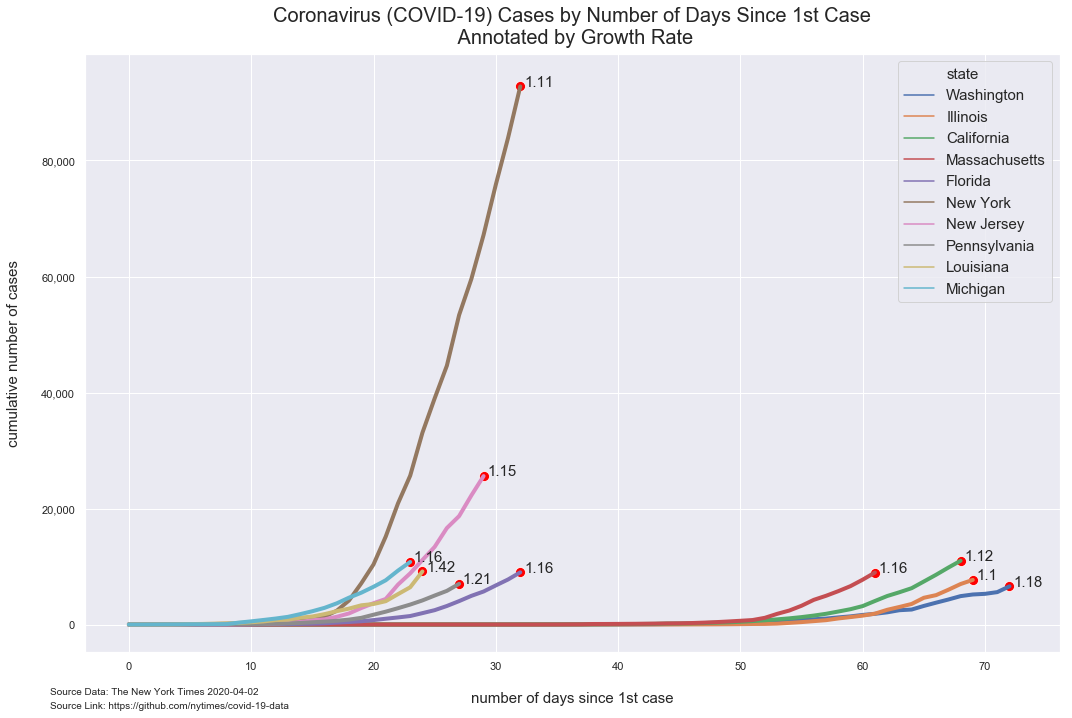

In [29]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="time_difference", y="cases",
             hue="state",
             data=state_first_case, linewidth=4)

sns.scatterplot(x="time_difference", y="cases", 
                data=trajectory_top_states_first_case_growth_rate, s=100, ax=ax1, color='red')

x = trajectory_top_states_first_case_growth_rate.cases
z = trajectory_top_states_first_case_growth_rate.time_difference
n = trajectory_top_states_first_case_growth_rate.growth_rate
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), xytext = (z[i] + 0.3, x[i] + 0), fontsize=15)
#ax1.set_yscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('number of days since 1st case', fontsize=15)
ax1.set_ylabel('cumulative number of cases', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Number of Days Since 1st Case\n Annotated by Growth Rate', 
          pad = 10, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-first-case')

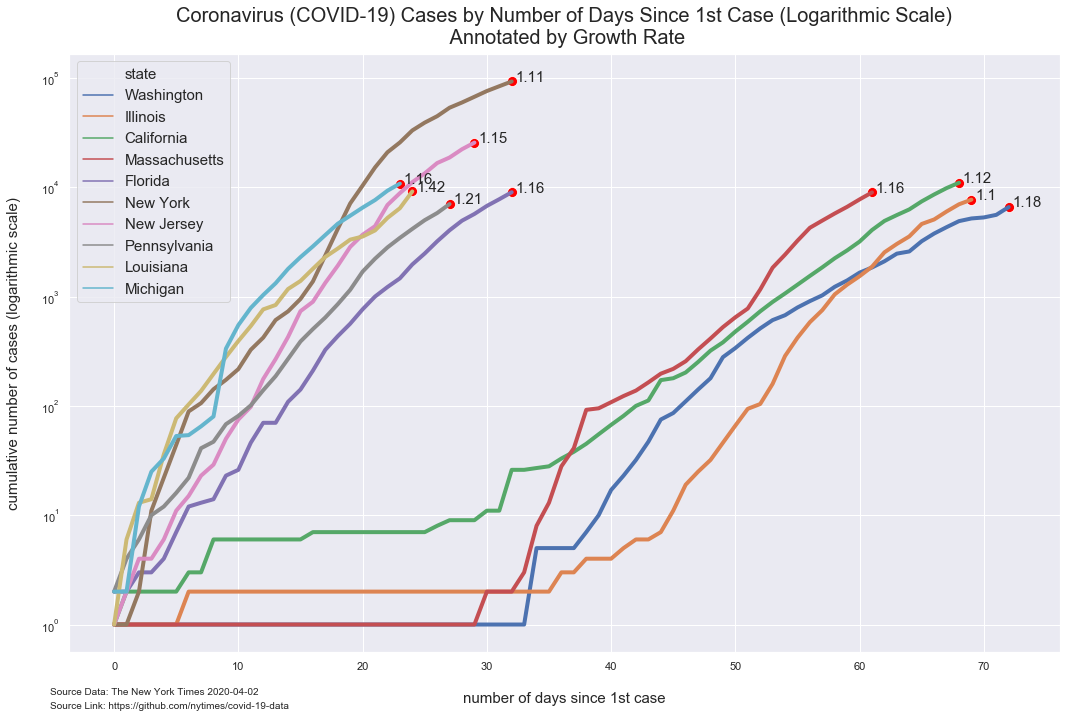

In [30]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="time_difference", y="cases",
             hue="state",
             data=state_first_case, linewidth=4)

sns.scatterplot(x="time_difference", y="cases", 
                data=trajectory_top_states_first_case_growth_rate, s=100, ax=ax1, color='red')

x = trajectory_top_states_first_case_growth_rate.cases
z = trajectory_top_states_first_case_growth_rate.time_difference
n = trajectory_top_states_first_case_growth_rate.growth_rate
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), xytext = (z[i] + 0.3, x[i] + 0), fontsize=15)

ax1.set_yscale('log')

ax1.xaxis.grid(True, which="major")

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('number of days since 1st case', fontsize=15)
ax1.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Number of Days Since 1st Case (Logarithmic Scale)\n Annotated by Growth Rate',
          pad = 10, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-first-case-log')

In [31]:
state_first_case

,date,state,fips,cases,deaths,date_first_case,time_difference
0,2020-01-21,Washington,53,1,0,2020-01-21,0
1,2020-01-22,Washington,53,1,0,2020-01-21,1
2,2020-01-23,Washington,53,1,0,2020-01-21,2
3,2020-01-24,Washington,53,1,0,2020-01-21,3
4,2020-01-25,Washington,53,1,0,2020-01-21,4
...,...,...,...,...,...,...,...
442,2020-03-29,Michigan,26,5486,132,2020-03-10,19
443,2020-03-30,Michigan,26,6508,197,2020-03-10,20
444,2020-03-31,Michigan,26,7630,264,2020-03-10,21
445,2020-04-01,Michigan,26,9293,336,2020-03-10,22


In [32]:
state_ten_cases = top_10_ts.loc[top_10_ts.cases >= 10]

In [33]:
state_ten_cases = state_ten_cases.sort_values(by=['date', 'cases'], ascending=[True, True], ).drop_duplicates(subset ="state", keep = 'first').reset_index(drop=True)

In [34]:
state_ten_cases = state_ten_cases[['date', 'state']]
state_ten_cases.rename(columns={'date': 'date_ten_case'}, inplace=True)

In [35]:
state_ten_cases

,date_ten_case,state
0,2020-02-24,California
1,2020-02-29,Washington
2,2020-03-04,New York
3,2020-03-07,Florida
4,2020-03-07,Massachusetts
5,2020-03-09,Pennsylvania
6,2020-03-09,Illinois
7,2020-03-09,New Jersey
8,2020-03-11,Louisiana
9,2020-03-12,Michigan


In [36]:
state_ten_cases = top_10_ts.merge(state_ten_cases, left_on='state', right_on='state')

In [37]:
state_ten_cases

,date,state,fips,cases,deaths,date_ten_case
0,2020-01-21,Washington,53,1,0,2020-02-29
1,2020-01-22,Washington,53,1,0,2020-02-29
2,2020-01-23,Washington,53,1,0,2020-02-29
3,2020-01-24,Washington,53,1,0,2020-02-29
4,2020-01-25,Washington,53,1,0,2020-02-29
...,...,...,...,...,...,...
442,2020-03-29,Michigan,26,5486,132,2020-03-12
443,2020-03-30,Michigan,26,6508,197,2020-03-12
444,2020-03-31,Michigan,26,7630,264,2020-03-12
445,2020-04-01,Michigan,26,9293,336,2020-03-12


In [38]:
state_ten_cases = state_ten_cases.loc[state_ten_cases.cases >= 10]

In [39]:
state_ten_cases

,date,state,fips,cases,deaths,date_ten_case
39,2020-02-29,Washington,53,10,1,2020-02-29
40,2020-03-01,Washington,53,17,3,2020-02-29
41,2020-03-02,Washington,53,23,6,2020-02-29
42,2020-03-03,Washington,53,32,10,2020-02-29
43,2020-03-04,Washington,53,47,11,2020-02-29
...,...,...,...,...,...,...
442,2020-03-29,Michigan,26,5486,132,2020-03-12
443,2020-03-30,Michigan,26,6508,197,2020-03-12
444,2020-03-31,Michigan,26,7630,264,2020-03-12
445,2020-04-01,Michigan,26,9293,336,2020-03-12


In [40]:
state_ten_cases['time_difference'] = (state_ten_cases['date'] - 
                                      state_ten_cases['date_ten_case']).dt.days

/Users/geribauer/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
trajectory_top_states_growth_rate = state_ten_cases.sort_values(by=['state', 'date', 'cases'], 
                                              ascending=[True, True, True])

In [42]:
trajectory_top_states_growth_rate.head(25)

,date,state,fips,cases,deaths,date_ten_case,time_difference
173,2020-02-24,California,6,11,0,2020-02-24,0
174,2020-02-25,California,6,11,0,2020-02-24,1
175,2020-02-26,California,6,26,0,2020-02-24,2
176,2020-02-27,California,6,26,0,2020-02-24,3
177,2020-02-28,California,6,27,0,2020-02-24,4
178,2020-02-29,California,6,28,0,2020-02-24,5
179,2020-03-01,California,6,33,0,2020-02-24,6
180,2020-03-02,California,6,38,0,2020-02-24,7
181,2020-03-03,California,6,45,0,2020-02-24,8
182,2020-03-04,California,6,55,1,2020-02-24,9


In [43]:
trajectory_top_states_growth_rate['growth_rate'] = (trajectory_top_states_growth_rate.cases / 
                                               trajectory_top_states_growth_rate.cases.shift(1))

In [44]:
trajectory_top_states_growth_rate.head(25)

,date,state,fips,cases,deaths,date_ten_case,time_difference,growth_rate
173,2020-02-24,California,6,11,0,2020-02-24,0,NaN
174,2020-02-25,California,6,11,0,2020-02-24,1,1.000000
175,2020-02-26,California,6,26,0,2020-02-24,2,2.363636
176,2020-02-27,California,6,26,0,2020-02-24,3,1.000000
177,2020-02-28,California,6,27,0,2020-02-24,4,1.038462
178,2020-02-29,California,6,28,0,2020-02-24,5,1.037037
179,2020-03-01,California,6,33,0,2020-02-24,6,1.178571
180,2020-03-02,California,6,38,0,2020-02-24,7,1.151515
181,2020-03-03,California,6,45,0,2020-02-24,8,1.184211
182,2020-03-04,California,6,55,1,2020-02-24,9,1.222222


In [45]:
trajectory_top_states_growth_rate = trajectory_top_states_growth_rate.sort_values(by=['date', 'cases'], 
                                              ascending=[False, False], ).drop_duplicates(subset ="state", 
                                                                                        keep = 'first').reset_index(drop=True)

In [46]:
trajectory_top_states_growth_rate.growth_rate = trajectory_top_states_growth_rate.growth_rate.round(2)

In [47]:
trajectory_top_states_growth_rate

,date,state,fips,cases,deaths,date_ten_case,time_difference,growth_rate
0,2020-04-02,New York,36,92770,2653,2020-03-04,29,1.11
1,2020-04-02,New Jersey,34,25590,539,2020-03-09,24,1.15
2,2020-04-02,California,6,10995,243,2020-02-24,38,1.12
3,2020-04-02,Michigan,26,10791,417,2020-03-12,21,1.16
4,2020-04-02,Louisiana,22,9150,310,2020-03-11,22,1.42
5,2020-04-02,Florida,12,9000,144,2020-03-07,26,1.16
6,2020-04-02,Massachusetts,25,8966,154,2020-03-07,26,1.16
7,2020-04-02,Illinois,17,7695,165,2020-03-09,24,1.10
8,2020-04-02,Pennsylvania,42,7016,90,2020-03-09,24,1.21
9,2020-04-02,Washington,53,6585,300,2020-02-29,33,1.18


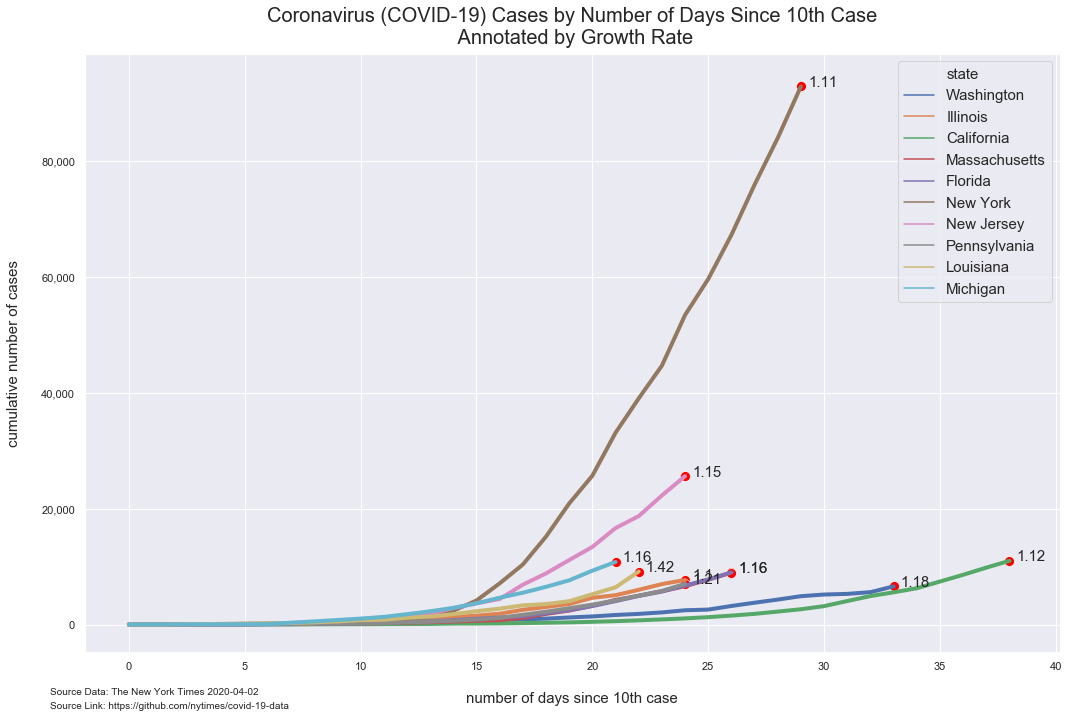

In [48]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="time_difference", y="cases",
             hue="state",
             data=state_ten_cases, linewidth=4)

sns.scatterplot(x="time_difference", y="cases", 
                data=trajectory_top_states_growth_rate, s=100, ax=ax1, color='red')

x = trajectory_top_states_growth_rate.cases
z = trajectory_top_states_growth_rate.time_difference
n = trajectory_top_states_growth_rate.growth_rate
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), xytext = (z[i] + 0.3, x[i] + 0), fontsize=15)
#ax1.set_yscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('number of days since 10th case', fontsize=15)
ax1.set_ylabel('cumulative number of cases', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Number of Days Since 10th Case\n Annotated by Growth Rate', 
          pad = 10, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-tenth-case')

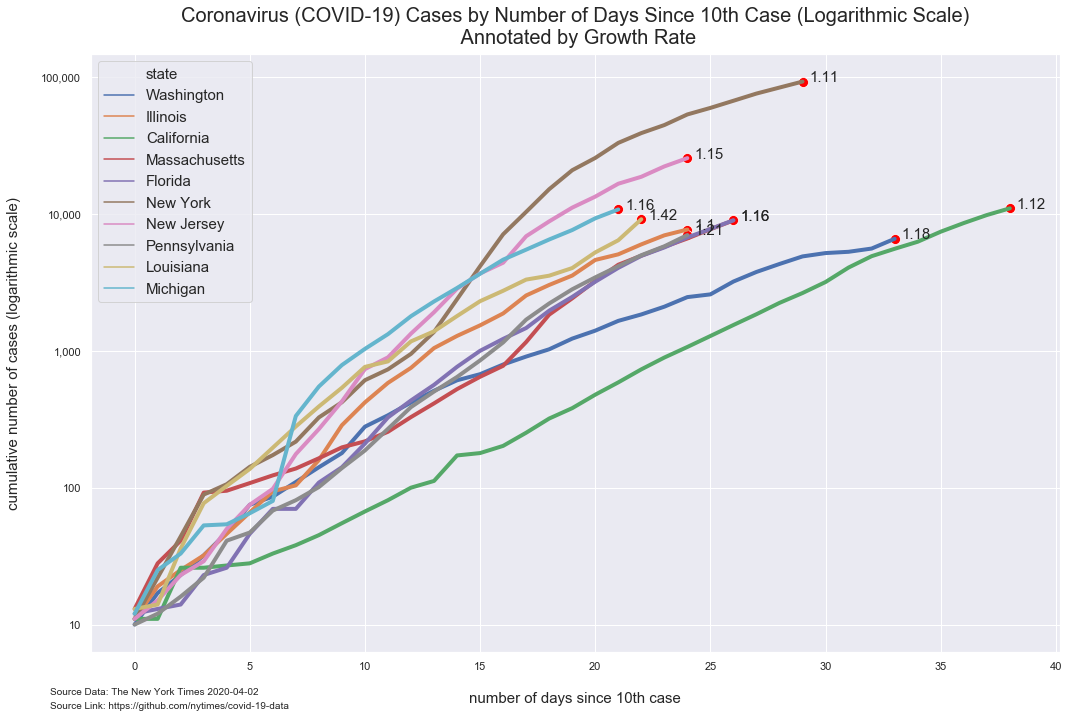

In [49]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="time_difference", y="cases",
             hue="state",
             data=state_ten_cases, linewidth=4)

sns.scatterplot(x="time_difference", y="cases", 
                data=trajectory_top_states_growth_rate, s=100, ax=ax1, color='red')

x = trajectory_top_states_growth_rate.cases
z = trajectory_top_states_growth_rate.time_difference
n = trajectory_top_states_growth_rate.growth_rate
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), xytext = (z[i] + 0.3, x[i] + 0), fontsize=15)
    
ax1.set_yscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.grid(True)
ax1.grid(axis='x', which='minor')
ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('number of days since 10th case', fontsize=15)
ax1.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
plt.title('Coronavirus (COVID-19) Cases by Number of Days Since 10th Case (Logarithmic Scale)\n Annotated by Growth Rate', 
          pad = 10, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-timeseries-tenth-case-log')

In [50]:
trajectory_plot = state_ten_cases.sort_values(by=['state', 'date','cases'], 
                                ascending=[True, True, True])

In [51]:
trajectory_plot['cases_diff'] = trajectory_plot['cases'].diff()

In [52]:
trajectory_plot.head(50)

,date,state,fips,cases,deaths,date_ten_case,time_difference,cases_diff
173,2020-02-24,California,6,11,0,2020-02-24,0,NaN
174,2020-02-25,California,6,11,0,2020-02-24,1,0.0
175,2020-02-26,California,6,26,0,2020-02-24,2,15.0
176,2020-02-27,California,6,26,0,2020-02-24,3,0.0
177,2020-02-28,California,6,27,0,2020-02-24,4,1.0
178,2020-02-29,California,6,28,0,2020-02-24,5,1.0
179,2020-03-01,California,6,33,0,2020-02-24,6,5.0
180,2020-03-02,California,6,38,0,2020-02-24,7,5.0
181,2020-03-03,California,6,45,0,2020-02-24,8,7.0
182,2020-03-04,California,6,55,1,2020-02-24,9,10.0


In [53]:
trajectory_plot.shape

(277, 8)

In [54]:
trajectory_plot['cases_diff'].loc[trajectory_plot.cases_diff < 0] = 0
trajectory_plot = trajectory_plot.fillna(0)

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [55]:
trajectory_plot.head(50)

,date,state,fips,cases,deaths,date_ten_case,time_difference,cases_diff
173,2020-02-24,California,6,11,0,2020-02-24,0,0.0
174,2020-02-25,California,6,11,0,2020-02-24,1,0.0
175,2020-02-26,California,6,26,0,2020-02-24,2,15.0
176,2020-02-27,California,6,26,0,2020-02-24,3,0.0
177,2020-02-28,California,6,27,0,2020-02-24,4,1.0
178,2020-02-29,California,6,28,0,2020-02-24,5,1.0
179,2020-03-01,California,6,33,0,2020-02-24,6,5.0
180,2020-03-02,California,6,38,0,2020-02-24,7,5.0
181,2020-03-03,California,6,45,0,2020-02-24,8,7.0
182,2020-03-04,California,6,55,1,2020-02-24,9,10.0


/Users/geribauer/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


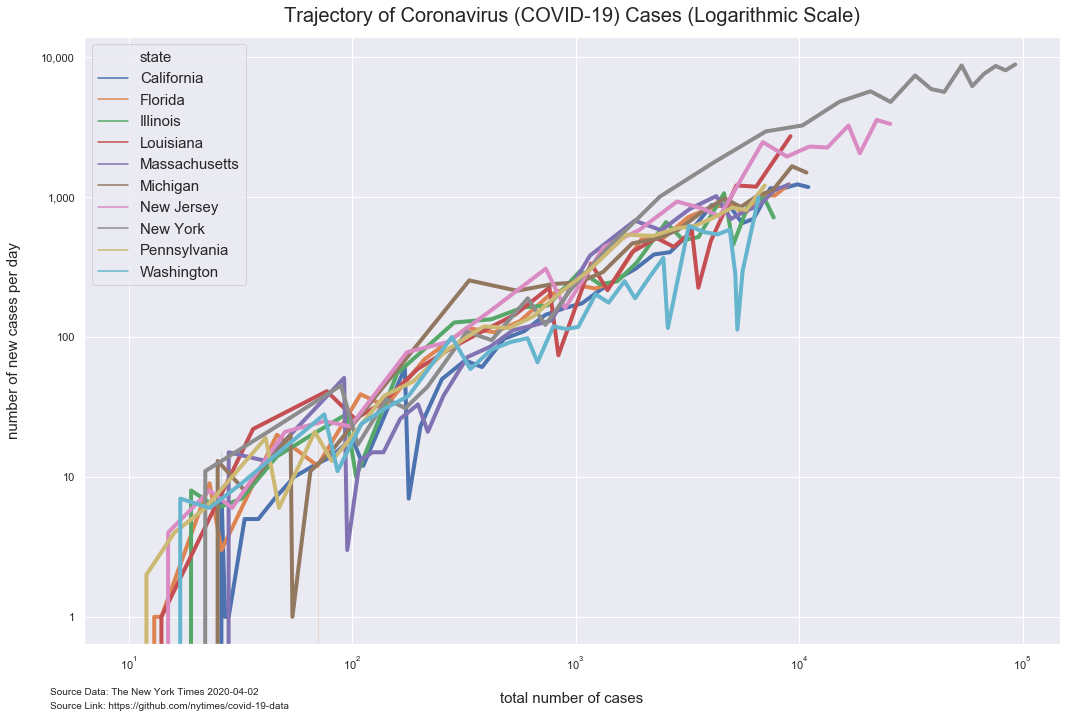

In [56]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="cases_diff",
             hue="state",
             data=trajectory_plot, linewidth=4)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('total number of cases', fontsize=15)
ax1.set_ylabel('number of new cases per day', fontsize=15)
plt.title('Trajectory of Coronavirus (COVID-19) Cases (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-trajectory-daily-plot')

In [57]:
trajectory_plot_weekly = trajectory_plot[['state', 'date', 'cases', 'cases_diff']]

In [58]:
trajectory_plot_weekly.head()

,state,date,cases,cases_diff
173,California,2020-02-24,11,0.0
174,California,2020-02-25,11,0.0
175,California,2020-02-26,26,15.0
176,California,2020-02-27,26,0.0
177,California,2020-02-28,27,1.0


In [59]:
trajectory_plot_weekly = trajectory_plot.set_index('date').groupby('state').resample('W').agg({'cases': np.max, 'cases_diff': np.mean})

In [60]:
trajectory_plot_weekly

cases   cases_diff
state         date                          
California    2020-03-01     33     3.142857
              2020-03-08    112    11.285714
              2020-03-15    478    52.285714
              2020-03-22   1851   196.142857
              2020-03-29   6266   630.714286
              2020-04-05  10995  1182.250000
Florida       2020-03-08     13     0.500000
              2020-03-15    109    13.714286
              2020-03-22   1000   127.285714
              2020-03-29   4942   563.142857
              2020-04-05   9000  1014.500000
Illinois      2020-03-15     94    11.857143
              2020-03-22   1047   136.142857
              2020-03-29   4613   509.428571
              2020-04-05   7695   770.500000
Louisiana     2020-03-15    103    18.000000
              2020-03-22    837   104.857143
              2020-03-29   3540   386.142857
              2020-04-05   9150  1402.500000
Massachusetts 2020-03-08     28     7.500000
              2020-03-15    164    19.428571
              2020-03-22    646    68.857143
              2020-03-29   4955   615.571429
              2020-04-05   8966  1002.750000
Michigan      2020-03-15     53    10.250000
              2020-03-22   1033   140.000000
              2020-03-29   5486   636.142857
              2020-04-05  10791  1326.250000
New Jersey    2020-03-15     98    12.428571
              2020-03-22   1914   259.428571
              2020-03-29  13386  1638.857143
              2020-04-05  25590  3051.000000
New York      2020-03-08    106    19.000000
              2020-03-15    732    89.428571
              2020-03-22  15168  2062.285714
              2020-03-29  59568  6342.857143
              2020-04-05  92770  8300.500000
Pennsylvania  2020-03-15     68     8.285714
              2020-03-22    504    62.285714
              2020-03-29   3441   419.571429
              2020-04-05   7016   893.750000
Washington    2020-03-01     17     3.500000
              2020-03-08    141    17.714286
              2020-03-15    675    76.285714
              2020-03-22   1844   167.000000
              2020-03-29   4896   436.000000
              2020-04-05   6585   422.250000

In [61]:
trajectory_plot_weekly.reset_index(inplace=True)
trajectory_plot_weekly.rename(columns={'cases_diff': 'cases_diff_week_avg'}, inplace=True)

In [62]:
trajectory_plot_weekly

,state,date,cases,cases_diff_week_avg
0,California,2020-03-01,33,3.142857
1,California,2020-03-08,112,11.285714
2,California,2020-03-15,478,52.285714
3,California,2020-03-22,1851,196.142857
4,California,2020-03-29,6266,630.714286
5,California,2020-04-05,10995,1182.250000
6,Florida,2020-03-08,13,0.500000
7,Florida,2020-03-15,109,13.714286
8,Florida,2020-03-22,1000,127.285714
9,Florida,2020-03-29,4942,563.142857


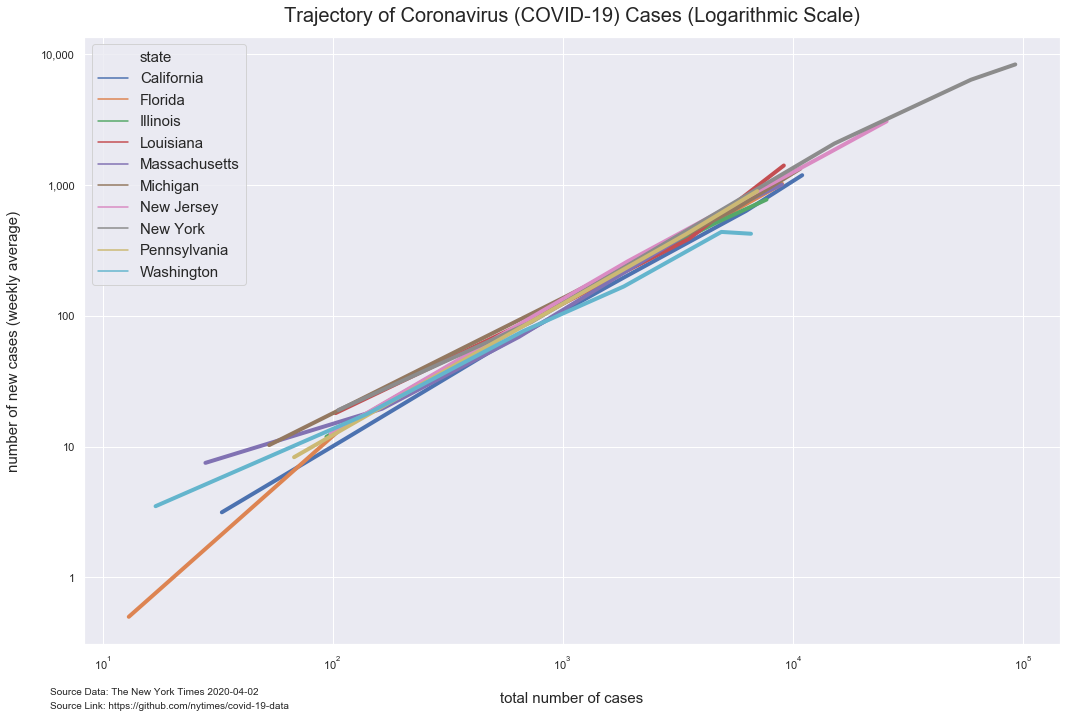

In [63]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="cases_diff_week_avg",
             hue="state",
             data=trajectory_plot_weekly, linewidth=4)

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.legend(fontsize=15)
ax1.set_xlabel('total number of cases', fontsize=15)
ax1.set_ylabel('number of new cases (weekly average)', fontsize=15)
plt.title('Trajectory of Coronavirus (COVID-19) Cases (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-state-trajectory-weekly-plot')

In [165]:
trajectory_all_states = covid_19_state_data.sort_values(by=['state', 'date','cases'], 
                                ascending=[True, True, True])

In [166]:
trajectory_all_states

,date,state,fips,cases,deaths
586,2020-03-13,Alabama,1,6,0
637,2020-03-14,Alabama,1,12,0
689,2020-03-15,Alabama,1,23,0
742,2020-03-16,Alabama,1,29,0
795,2020-03-17,Alabama,1,39,0
...,...,...,...,...,...
1498,2020-03-29,Wyoming,56,87,0
1553,2020-03-30,Wyoming,56,95,0
1608,2020-03-31,Wyoming,56,120,0
1663,2020-04-01,Wyoming,56,137,0


In [167]:
trajectory_all_states['cases_diff'] = trajectory_all_states['cases'].diff()
trajectory_all_states['cases_diff'].loc[trajectory_all_states.cases_diff < 0] = 0
trajectory_all_states = trajectory_all_states.fillna(0)
trajectory_all_states = trajectory_all_states.set_index('date').groupby('state').resample('W').agg({'cases': np.max, 
                                                                                                    'cases_diff': np.mean})
trajectory_all_states.reset_index(inplace=True)
trajectory_all_states.rename(columns={'cases_diff': 'cases_diff_week_avg'}, inplace=True)

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [168]:
trajectory_all_states.head()

,state,date,cases,cases_diff_week_avg
0,Alabama,2020-03-15,23,5.666667
1,Alabama,2020-03-22,157,19.142857
2,Alabama,2020-03-29,830,96.142857
3,Alabama,2020-04-05,1270,110.000000
4,Alaska,2020-03-15,1,0.000000


In [169]:
print(trajectory_all_states.loc[trajectory_all_states.cases_diff_week_avg < 1])

print(len(trajectory_all_states.loc[trajectory_all_states.cases_diff_week_avg < 1]))

         state       date  cases  cases_diff_week_avg
4       Alaska 2020-03-15      1                  0.0
8      Arizona 2020-01-26      1                  0.0
9      Arizona 2020-02-02      1                  0.0
10     Arizona 2020-02-09      1                  0.0
11     Arizona 2020-02-16      1                  0.0
..         ...        ...    ...                  ...
283  Wisconsin 2020-02-16      1                  0.0
284  Wisconsin 2020-02-23      1                  0.0
285  Wisconsin 2020-03-01      1                  0.0
286  Wisconsin 2020-03-08      1                  0.0
291    Wyoming 2020-03-15      3                  0.4

[74 rows x 4 columns]
74


In [170]:
trajectory_all_states = trajectory_all_states.loc[trajectory_all_states.cases_diff_week_avg > 0]

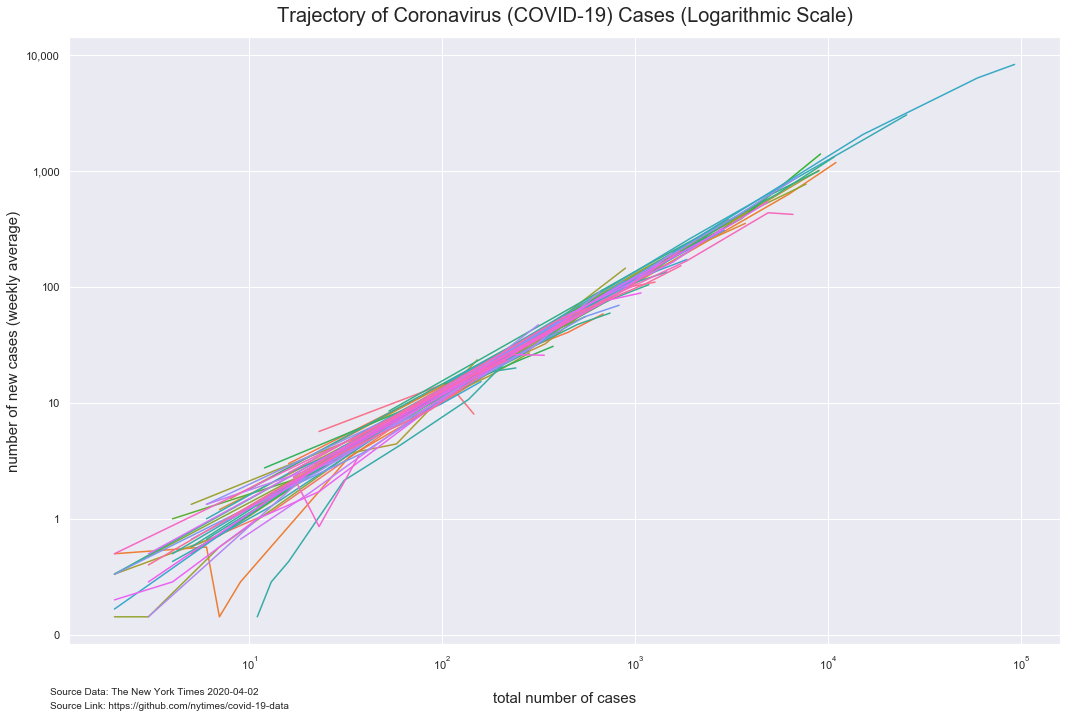

In [171]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="cases_diff_week_avg",
             hue="state",
             data=trajectory_all_states)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

ax1.legend_.remove()
ax1.set_xlabel('total number of cases', fontsize=15)
ax1.set_ylabel('number of new cases (weekly average)', fontsize=15)
plt.title('Trajectory of Coronavirus (COVID-19) Cases (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-all-states-trajectory-weekly-plot')

In [172]:
trajectory_all_states_scatter = trajectory_all_states.sort_values(by=['date', 'cases'], 
                                              ascending=[False, False], ).drop_duplicates(subset ="state", 
                                                                                        keep = 'first').reset_index(drop=True)

In [173]:
trajectory_all_states_scatter

,state,date,cases,cases_diff_week_avg
0,New York,2020-04-05,92770,8300.50
1,New Jersey,2020-04-05,25590,3051.00
2,California,2020-04-05,10995,1182.25
3,Michigan,2020-04-05,10791,1326.25
4,Louisiana,2020-04-05,9150,1402.50
5,Florida,2020-04-05,9000,1014.50
6,Massachusetts,2020-04-05,8966,1002.75
7,Illinois,2020-04-05,7695,770.50
8,Pennsylvania,2020-04-05,7016,893.75
9,Washington,2020-04-05,6585,422.25


In [174]:
len(trajectory_all_states_scatter)

55

In [175]:
print(list(trajectory_all_states_scatter.state))

['New York', 'New Jersey', 'California', 'Michigan', 'Louisiana', 'Florida', 'Massachusetts', 'Illinois', 'Pennsylvania', 'Washington', 'Georgia', 'Texas', 'Connecticut', 'Colorado', 'Indiana', 'Ohio', 'Tennessee', 'Maryland', 'North Carolina', 'Missouri', 'Wisconsin', 'Virginia', 'Arizona', 'South Carolina', 'Nevada', 'Alabama', 'Mississippi', 'Utah', 'Idaho', 'Oklahoma', 'Oregon', 'Kentucky', 'Minnesota', 'Arkansas', 'Rhode Island', 'District of Columbia', 'Iowa', 'Kansas', 'New Hampshire', 'New Mexico', 'Delaware', 'Maine', 'Vermont', 'Puerto Rico', 'Hawaii', 'Nebraska', 'Montana', 'West Virginia', 'South Dakota', 'North Dakota', 'Wyoming', 'Guam', 'Alaska', 'Virgin Islands', 'Northern Mariana Islands']


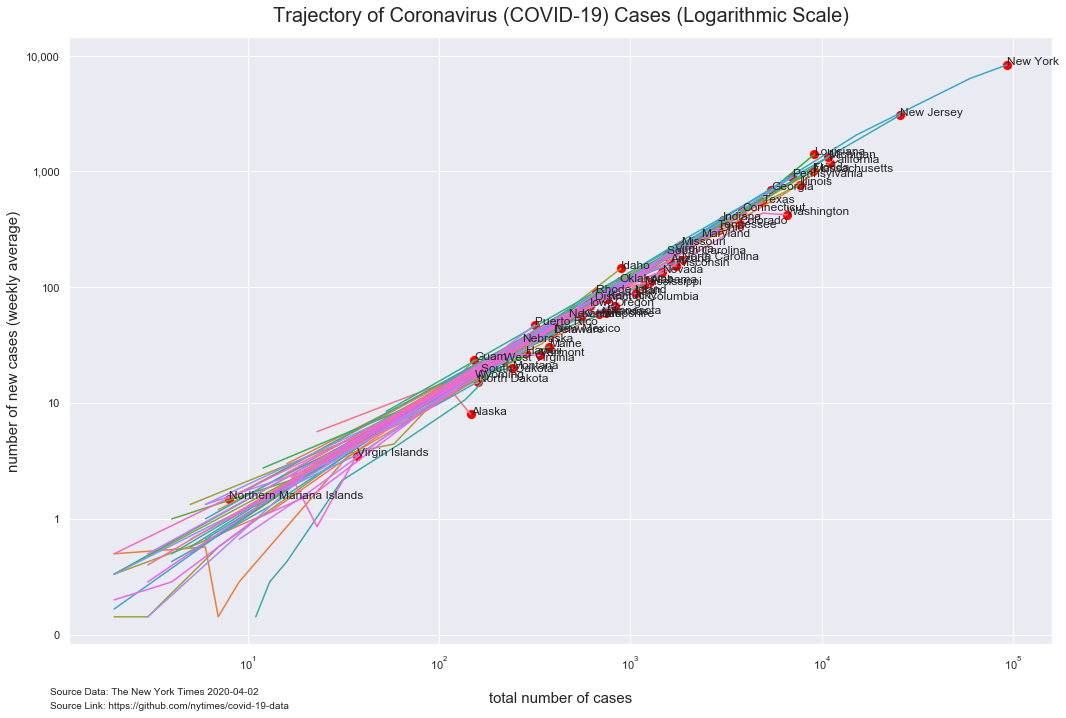

In [176]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="cases_diff_week_avg",
             hue="state",
             data=trajectory_all_states)

sns.scatterplot(x="cases", y="cases_diff_week_avg", 
             data=trajectory_all_states_scatter, s=100, ax=ax1, color='red')


x = trajectory_all_states_scatter.cases_diff_week_avg
z = trajectory_all_states_scatter.cases
n = trajectory_all_states_scatter.state
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5
#ax1.set_xbound(lower=100)

ax1.legend_.remove()
ax1.set_xlabel('total number of cases', fontsize=15)
ax1.set_ylabel('number of new cases (weekly average)', fontsize=15)
plt.title('Trajectory of Coronavirus (COVID-19) Cases (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-all-states-trajectory-weekly-plot-labels')

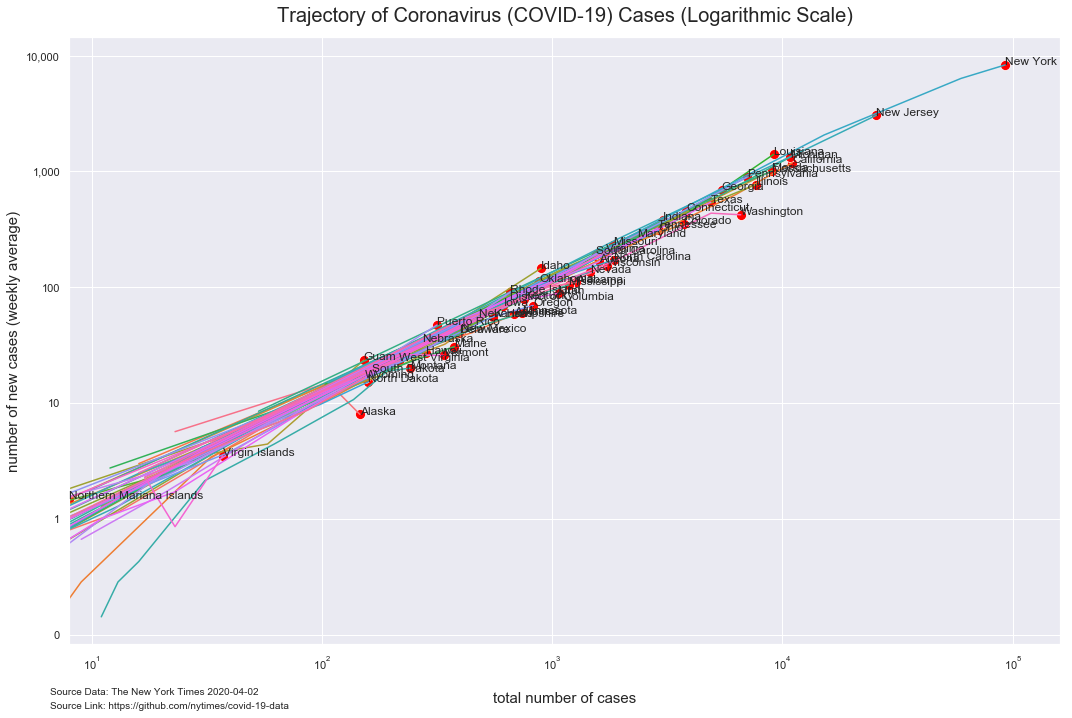

In [238]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="cases_diff_week_avg",
             hue="state",
             data=trajectory_all_states)

sns.scatterplot(x="cases", y="cases_diff_week_avg", 
             data=trajectory_all_states_scatter, s=100, ax=ax1, color='red')


x = trajectory_all_states_scatter.cases_diff_week_avg
z = trajectory_all_states_scatter.cases
n = trajectory_all_states_scatter.state
for i, label in enumerate(n):
    ax1.annotate(label, (z[i], x[i]), fontsize=12)
                
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 5

limit = int(trajectory_all_states_scatter.sort_values(by='cases').cases.iloc[0])
ax1.set_xlim(left=limit)


ax1.legend_.remove()
ax1.set_xlabel('total number of cases', fontsize=15)
ax1.set_ylabel('number of new cases (weekly average)', fontsize=15)
plt.title('Trajectory of Coronavirus (COVID-19) Cases (Logarithmic Scale)', pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-all-states-trajectory-weekly-plot-labels-xlimit')

In [77]:
g = covid_19_state_data.groupby('date')['cases'].sum().reset_index()

g.set_index('date', drop=False, inplace=True)

g.index = pd.to_datetime(g.index, infer_datetime_format=True)

In [78]:
g.index.dtype

dtype('<M8[ns]')

In [79]:
g.head()

,date,cases
date,,
2020-01-21,2020-01-21,1
2020-01-22,2020-01-22,1
2020-01-23,2020-01-23,1
2020-01-24,2020-01-24,2
2020-01-25,2020-01-25,3


In [80]:
g.tail()

,date,cases
date,,
2020-03-29,2020-03-29,142194
2020-03-30,2020-03-30,163683
2020-03-31,2020-03-31,188049
2020-04-01,2020-04-01,214711
2020-04-02,2020-04-02,244228


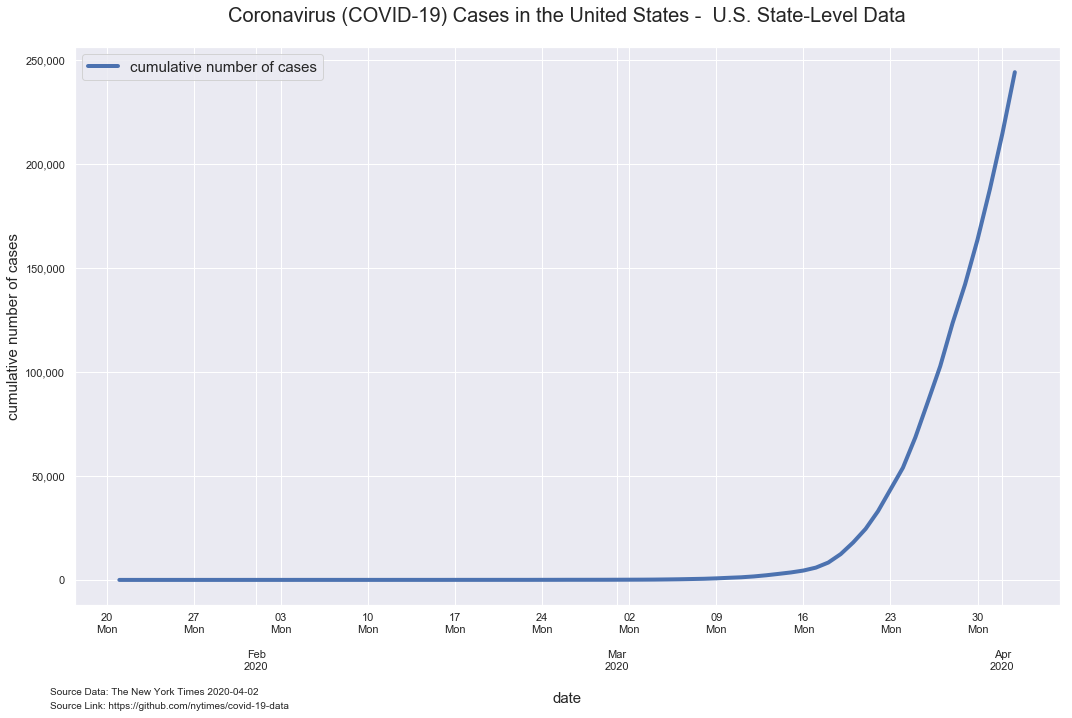

In [81]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

ax1.plot(g['cases'], linewidth=4)

ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax1.set_xlabel('date', fontsize=15, labelpad = 20)
ax1.set_ylabel('cumulative number of cases', fontsize=15)

ax1.grid(True)
ax1.grid(which='minor')

ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
plt.title('Coronavirus (COVID-19) Cases in the United States -  U.S. State-Level Data', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-linear')

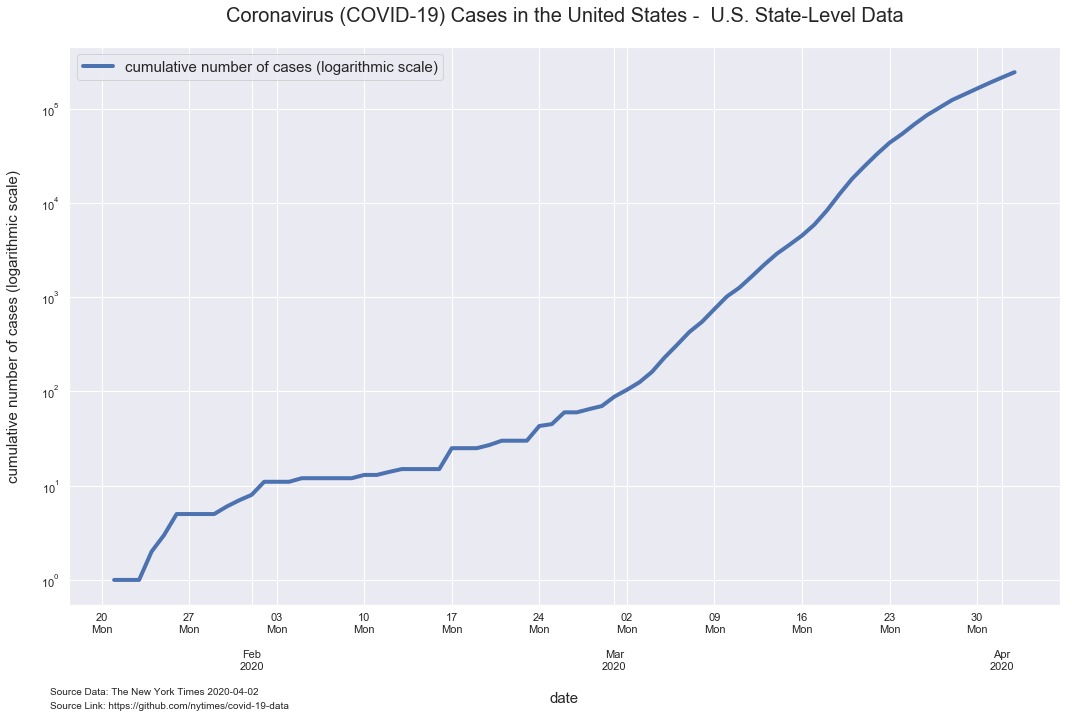

In [82]:
fig, ax2 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

ax2.plot(g['cases'], linewidth=4)

ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax2.set_xlabel('date', fontsize=15, labelpad = 20)
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, labelpad = 20)

ax2.grid(True)
ax2.grid(which='minor', axis='x')

ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=0, fontsize=15)
plt.title('Coronavirus (COVID-19) Cases in the United States -  U.S. State-Level Data', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

ax2.set_yscale('log')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-log')

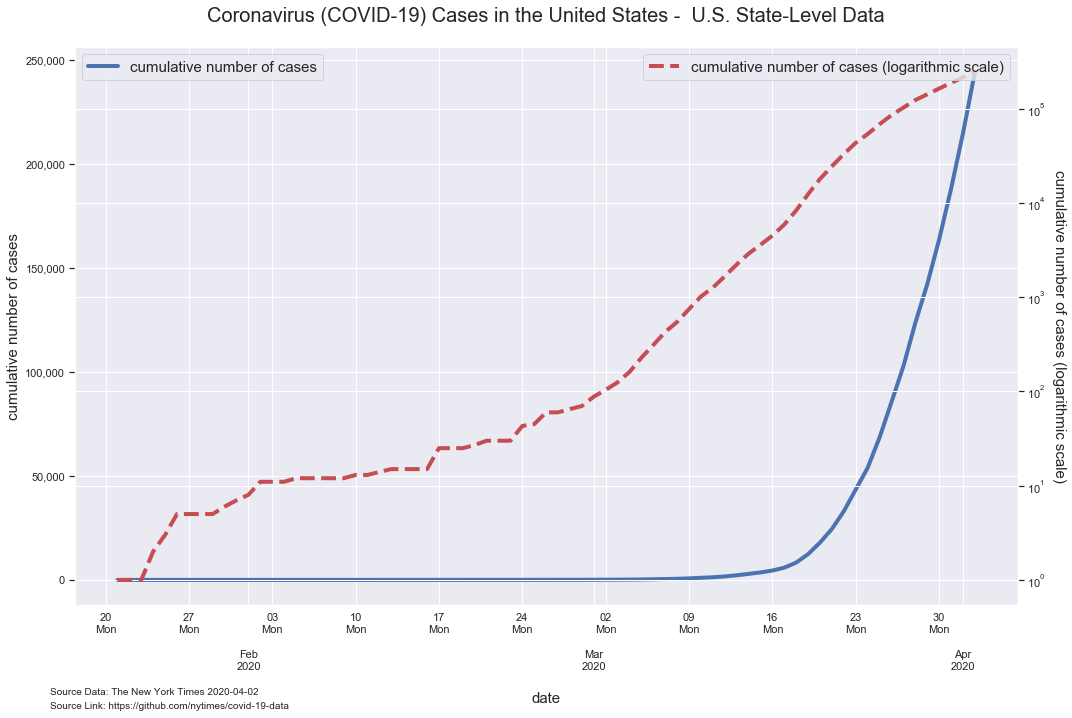

In [83]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax1.plot(g['cases'], linewidth=4)

# Plot 2
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')

ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0),interval=1))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))

ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax1.set_xlabel('date', fontsize=15, labelpad = 20)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, rotation = 270, labelpad = 20)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_yaxis().set_visible(True)
ax2.set_yscale('log')

ax1.grid(True)
ax1.grid(which='minor')
ax2.tick_params(axis='both', which='minor', length=0)
plt.setp(ax2.get_yticklabels(), visible=True)

ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=1, fontsize=15)
plt.title('Coronavirus (COVID-19) Cases in the United States -  U.S. State-Level Data', pad = 25, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-overlay')

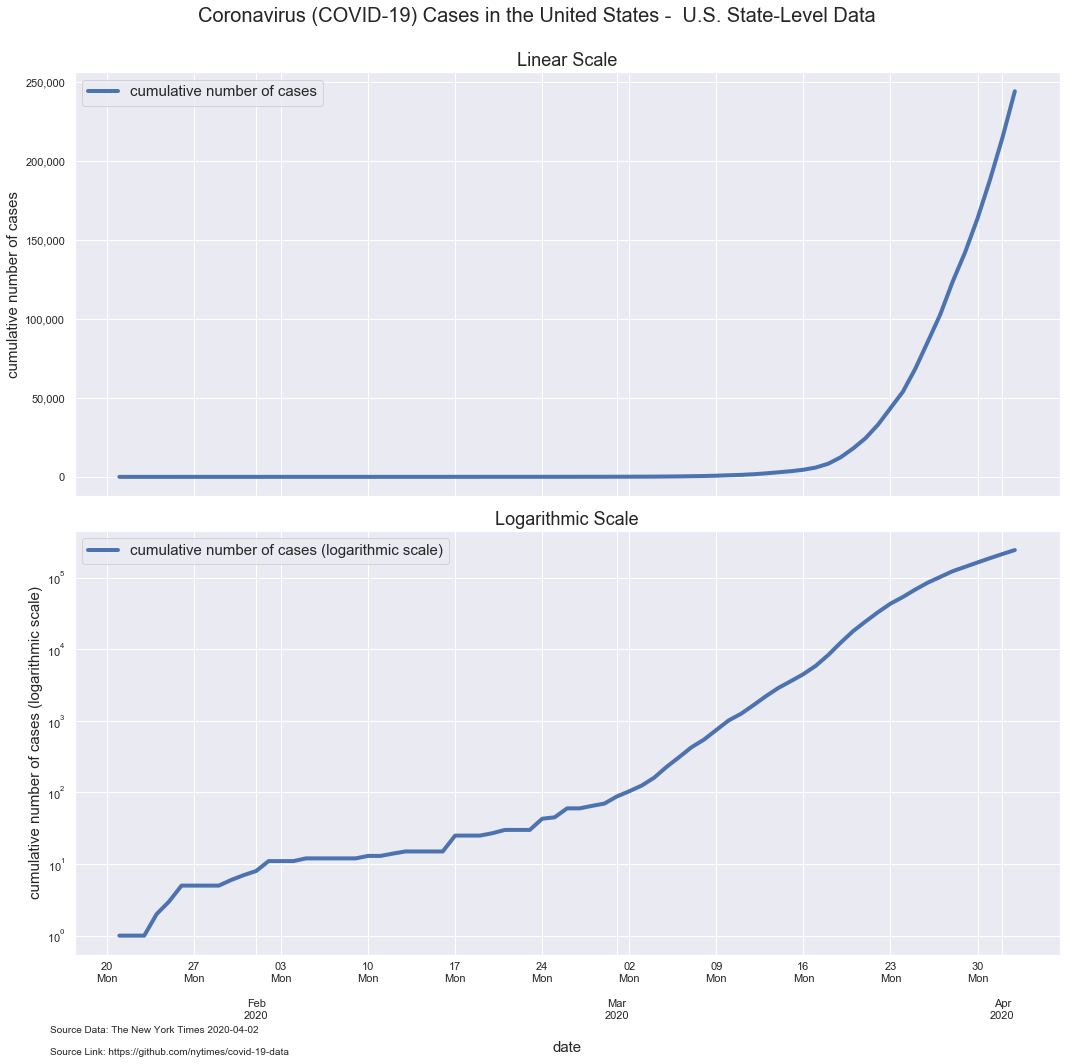

In [84]:
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True, figsize=(15,15))
fig.suptitle('Coronavirus (COVID-19) Cases in the United States -  U.S. State-Level Data', fontsize=20)
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax1.plot(g['cases'], linewidth=4)
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax1.grid(True)
ax1.grid(which='minor')

# Plot 2
ax2.plot(g['cases'], linewidth=4)
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
ax2.set_xlabel('date', fontsize=15, labelpad = 20)
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax2.grid(True)
ax2.grid(which='minor', axis='x')

# Formatting Figure
ax1.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=2, fontsize=15)
ax1.set_title('Linear Scale', fontsize=18)
ax2.set_title('Logarithmic Scale', fontsize=18)
ax2.set_yscale('log')

plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.savefig('figures/nyt-covid-19-data-2-subplots')

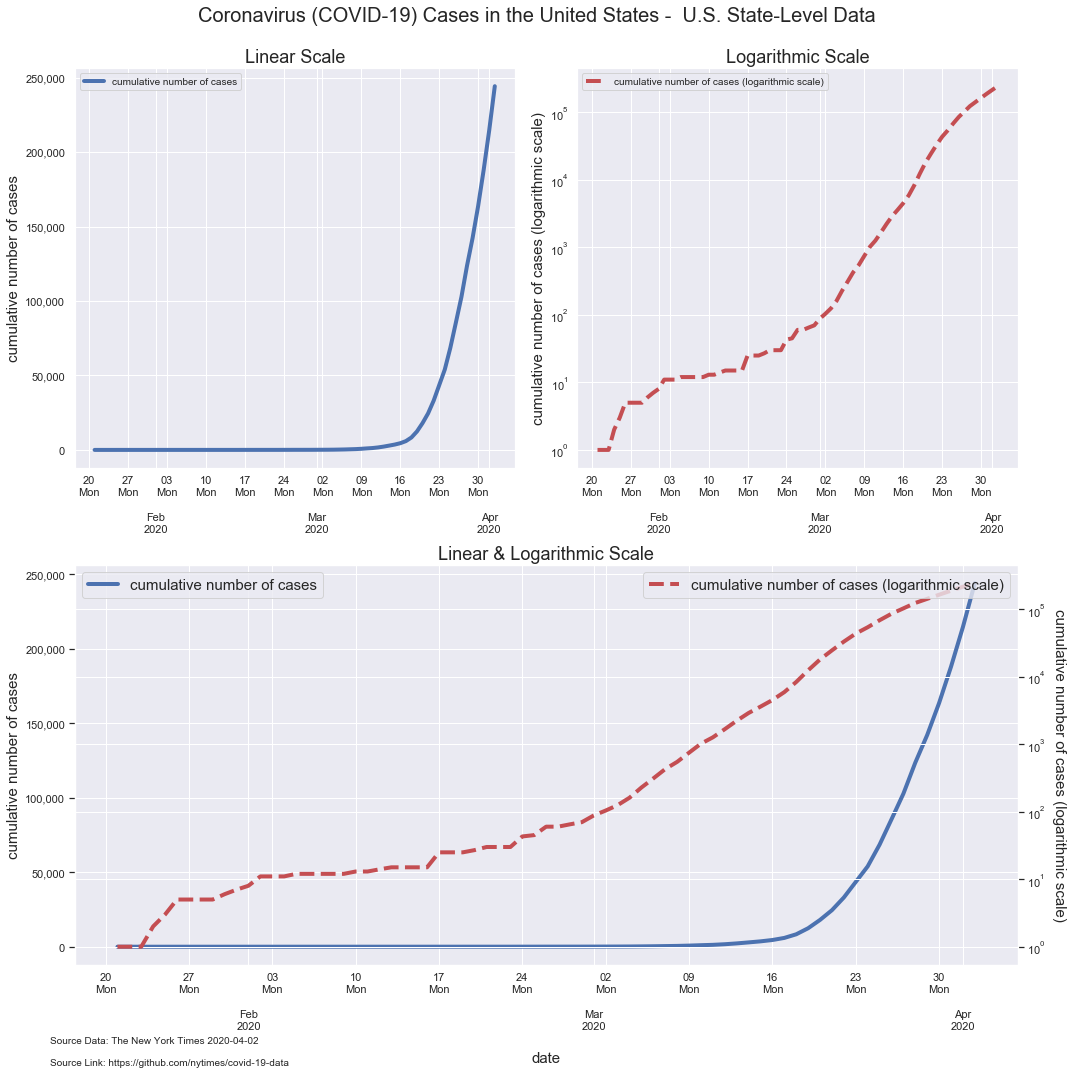

In [85]:
fig, [ax1, ax2, ax3, ax3_1] = plt.subplots(4, 1, sharex=True, figsize=(15,15))
fig.suptitle('Coronavirus (COVID-19) Cases in the United States -  U.S. State-Level Data', y = .99, fontsize=20)
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

# Plot 1
ax3 = plt.subplot(212)
ax3.plot(g['cases'], linewidth=4)
ax3.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax3.set_xlabel('Date', fontsize=15, labelpad = 20)
ax3.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax3_1 = ax3.twinx()  # instantiate a second axes that shares the same x-axis
ax3_1.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')
ax3_1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax3_1.xaxis.grid(True, which="major")
ax3_1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax3_1.set_yscale('log')

ax3.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax3.xaxis.grid(True, which="major")
ax3.xaxis.set_major_locator(dates.MonthLocator())
ax3.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Plot 2
ax1 = plt.subplot(221)
ax1.plot(g['cases'], linewidth=4)
ax1.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax1.xaxis.grid(True, which="major")
ax1.xaxis.set_major_locator(dates.MonthLocator())
ax1.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))


# Plot 3
ax2 = plt.subplot(222)
ax2.plot(g['cases'], linewidth=4, color='r', linestyle='dashed')
ax2.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0), interval=1))

ax2.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.xaxis.set_minor_formatter(dates.DateFormatter('%d\n%a'))
ax2.xaxis.grid(True, which="major")
ax2.xaxis.set_major_locator(dates.MonthLocator())
ax2.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b\n%Y'))

# Formatting Grid
ax1.grid(True)
ax1.grid(which='minor')
ax2.grid(True)
ax2.grid(which='minor', axis='x')
ax3.grid(True)
ax3.grid(which='minor')
ax3_1.grid(True)
ax3_1.grid(which='minor', axis='x')
ax3_1.tick_params(axis='both', which='minor', length=0)

# Setting Labels
ax1.set_ylabel('cumulative number of cases', fontsize=15)
ax2.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15)
ax3.set_ylabel('cumulative number of cases', fontsize=15)
ax3.set_xlabel('date', fontsize=15, labelpad = 20)
ax3_1.set_ylabel('cumulative number of cases (logarithmic scale)', fontsize=15, rotation = 270, labelpad = 20)
ax2.get_yaxis().set_visible(True)
ax2.set_yscale('log')
ax2.get_yaxis().set_visible(True)
ax3_1.get_yaxis().set_visible(True)
ax3_1.set_yscale('log')
ax3_1.get_yaxis().set_visible(True)

# Setting Titles
ax1.set_title('\n\nLinear Scale', fontsize=18)
ax2.set_title('Logarithmic Scale', fontsize=18)
ax3.set_title('Linear & Logarithmic Scale', fontsize=18)

# Setting Legends
ax1.legend(['cumulative number of cases'], loc=2, fontsize=10)
ax2.legend(['cumulative number of cases (logarithmic scale)'], loc=2, fontsize=10)
ax3.legend(['cumulative number of cases'], loc=2, fontsize=15)
ax3_1.legend(['cumulative number of cases (logarithmic scale)'], loc=1, fontsize=15)

plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-3-subplots')

In [86]:
g['cases_diff'] = g['cases'].diff()
g = g.fillna(0)

In [87]:
g.head(20)

,date,cases,cases_diff
date,,,
2020-01-21,2020-01-21,1,0.0
2020-01-22,2020-01-22,1,0.0
2020-01-23,2020-01-23,1,0.0
2020-01-24,2020-01-24,2,1.0
2020-01-25,2020-01-25,3,1.0
2020-01-26,2020-01-26,5,2.0
2020-01-27,2020-01-27,5,0.0
2020-01-28,2020-01-28,5,0.0
2020-01-29,2020-01-29,5,0.0


In [88]:
g[50:100]

,date,cases,cases_diff
date,,,
2020-03-11,2020-03-11,1263,245.0
2020-03-12,2020-03-12,1668,405.0
2020-03-13,2020-03-13,2224,556.0
2020-03-14,2020-03-14,2898,674.0
2020-03-15,2020-03-15,3600,702.0
2020-03-16,2020-03-16,4507,907.0
2020-03-17,2020-03-17,5905,1398.0
2020-03-18,2020-03-18,8345,2440.0
2020-03-19,2020-03-19,12413,4068.0


In [89]:
g_weekly = g.set_index('date').resample('W').agg({'cases': np.max, 'cases_diff': np.mean})

In [90]:
g_weekly

,cases,cases_diff
date,,
2020-01-26,5,0.666667
2020-02-02,11,0.857143
2020-02-09,12,0.142857
2020-02-16,15,0.428571
2020-02-23,30,2.142857
2020-03-01,88,8.285714
2020-03-08,547,65.571429
2020-03-15,3600,436.142857
2020-03-22,33061,4208.714286


In [91]:
g_weekly.reset_index(inplace=True)
g_weekly.rename(columns={'cases_diff': 'cases_diff_week_avg'}, inplace=True)

In [92]:
g_weekly

,date,cases,cases_diff_week_avg
0,2020-01-26,5,0.666667
1,2020-02-02,11,0.857143
2,2020-02-09,12,0.142857
3,2020-02-16,15,0.428571
4,2020-02-23,30,2.142857
5,2020-03-01,88,8.285714
6,2020-03-08,547,65.571429
7,2020-03-15,3600,436.142857
8,2020-03-22,33061,4208.714286
9,2020-03-29,142194,15590.428571


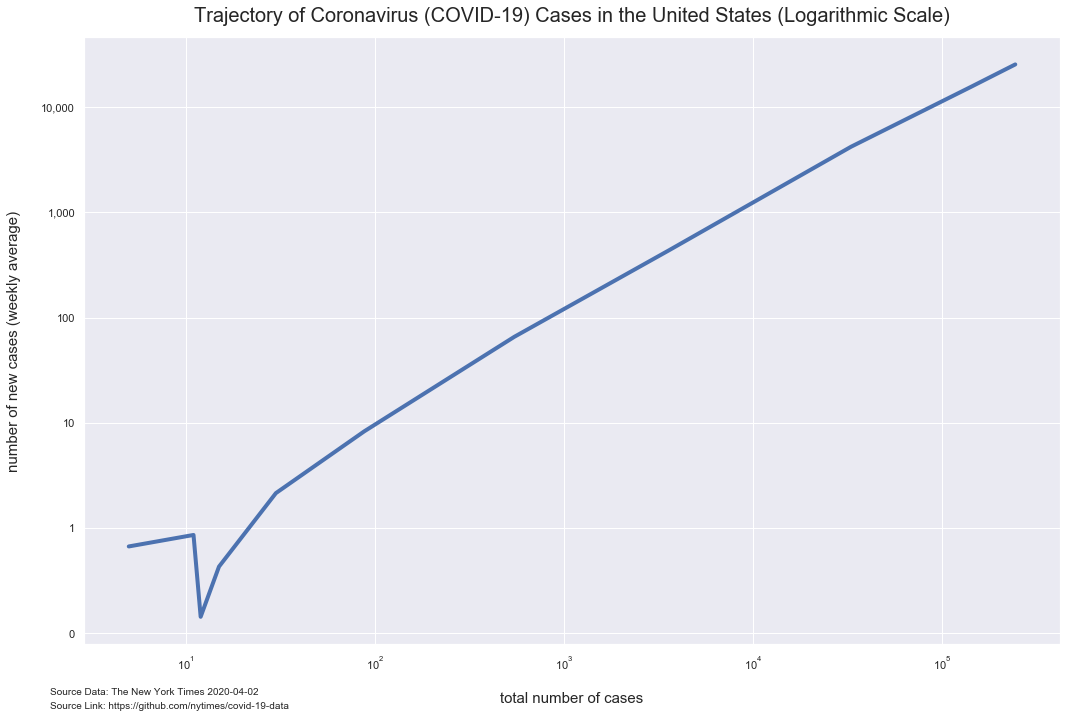

In [93]:
fig, ax1 = plt.subplots(figsize=(15,10))
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')

sns.lineplot(x="cases", y="cases_diff_week_avg", data=g_weekly, linewidth=4)
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.xaxis.grid(True, which="major")
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax1.xaxis.labelpad = 20
ax1.yaxis.labelpad = 20

ax1.set_xlabel('total number of cases', fontsize=15)
ax1.set_ylabel('number of new cases (weekly average)', fontsize=15)
plt.title('Trajectory of Coronavirus (COVID-19) Cases in the United States (Logarithmic Scale)', 
          pad = 15, fontsize=20)
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=10)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=10)

plt.tight_layout()
plt.savefig('figures/nyt-covid-19-usa-trajectory-weekly-plot')

In [94]:
covid_19_state_data

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
1714,2020-04-02,Virginia,51,1706,41
1715,2020-04-02,Washington,53,6585,300
1716,2020-04-02,West Virginia,54,217,2
1717,2020-04-02,Wisconsin,55,1730,37


In [95]:
# dropping ALL duplicate values 
state_current_cases = covid_19_state_data.sort_values(by = 'date', 
                    ascending=False).drop_duplicates(
                    subset ="state", keep = 'first')

In [96]:
state_current_cases.head()

,date,state,fips,cases,deaths
1718,2020-04-02,Wyoming,56,153,0
1691,2020-04-02,Montana,30,241,6
1689,2020-04-02,Mississippi,28,1177,26
1688,2020-04-02,Minnesota,27,742,18
1687,2020-04-02,Michigan,26,10791,417


In [97]:
state_current_cases.state.value_counts()

Idaho                       1
Wisconsin                   1
Maryland                    1
California                  1
Guam                        1
North Dakota                1
Virgin Islands              1
Indiana                     1
Montana                     1
Florida                     1
Puerto Rico                 1
Kentucky                    1
Utah                        1
Michigan                    1
South Dakota                1
South Carolina              1
Northern Mariana Islands    1
Georgia                     1
Missouri                    1
Illinois                    1
Hawaii                      1
District of Columbia        1
Arkansas                    1
Virginia                    1
Colorado                    1
Pennsylvania                1
Louisiana                   1
Ohio                        1
New Jersey                  1
Delaware                    1
Tennessee                   1
Alaska                      1
New York                    1
Nevada    

In [98]:
state_current_cases.loc[state_current_cases.state == 'New York']

,date,state,fips,cases,deaths
1697,2020-04-02,New York,36,92770,2653


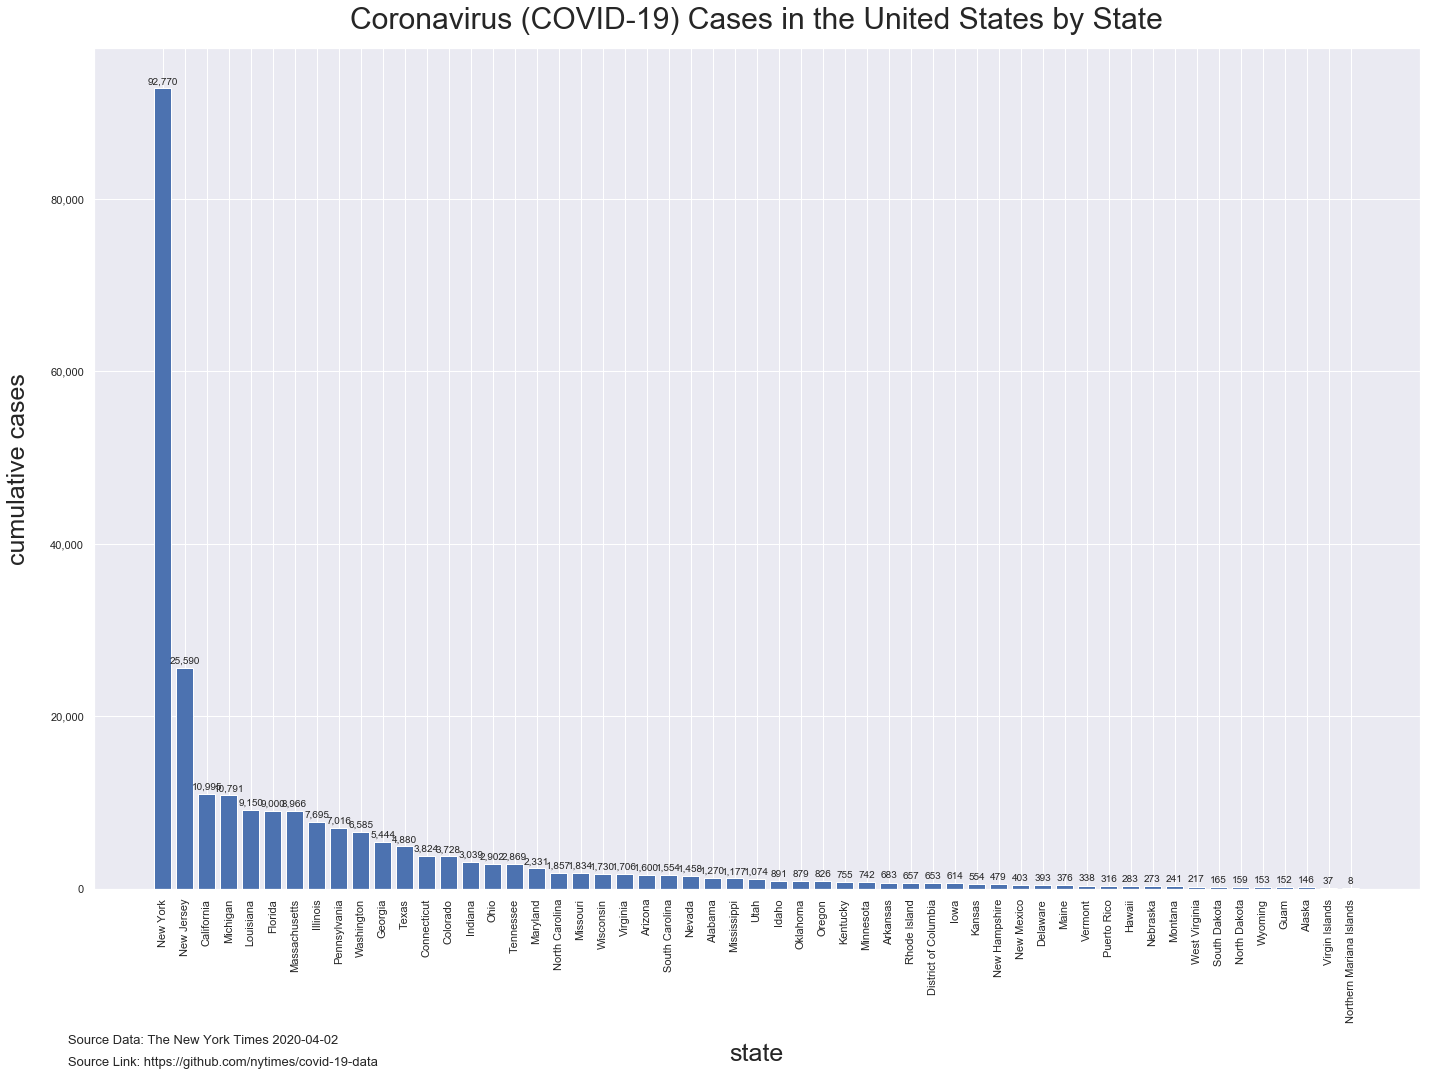

In [99]:
bar = state_current_cases.sort_values(by = 'cases', 
                    ascending=False)
bar.set_index('state', drop=False, inplace=True)

plt.subplots(figsize=(20,15))
ax = plt.subplot()

label = ax.bar(bar.index, bar.cases)
plt.xlabel("state", labelpad=14, fontsize=25)
plt.xticks(rotation=90)
plt.ylabel("cumulative cases", labelpad=14, fontsize=25)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:,}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(label)

txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=13)

plt.title("Coronavirus (COVID-19) Cases in the United States by State", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-bar')

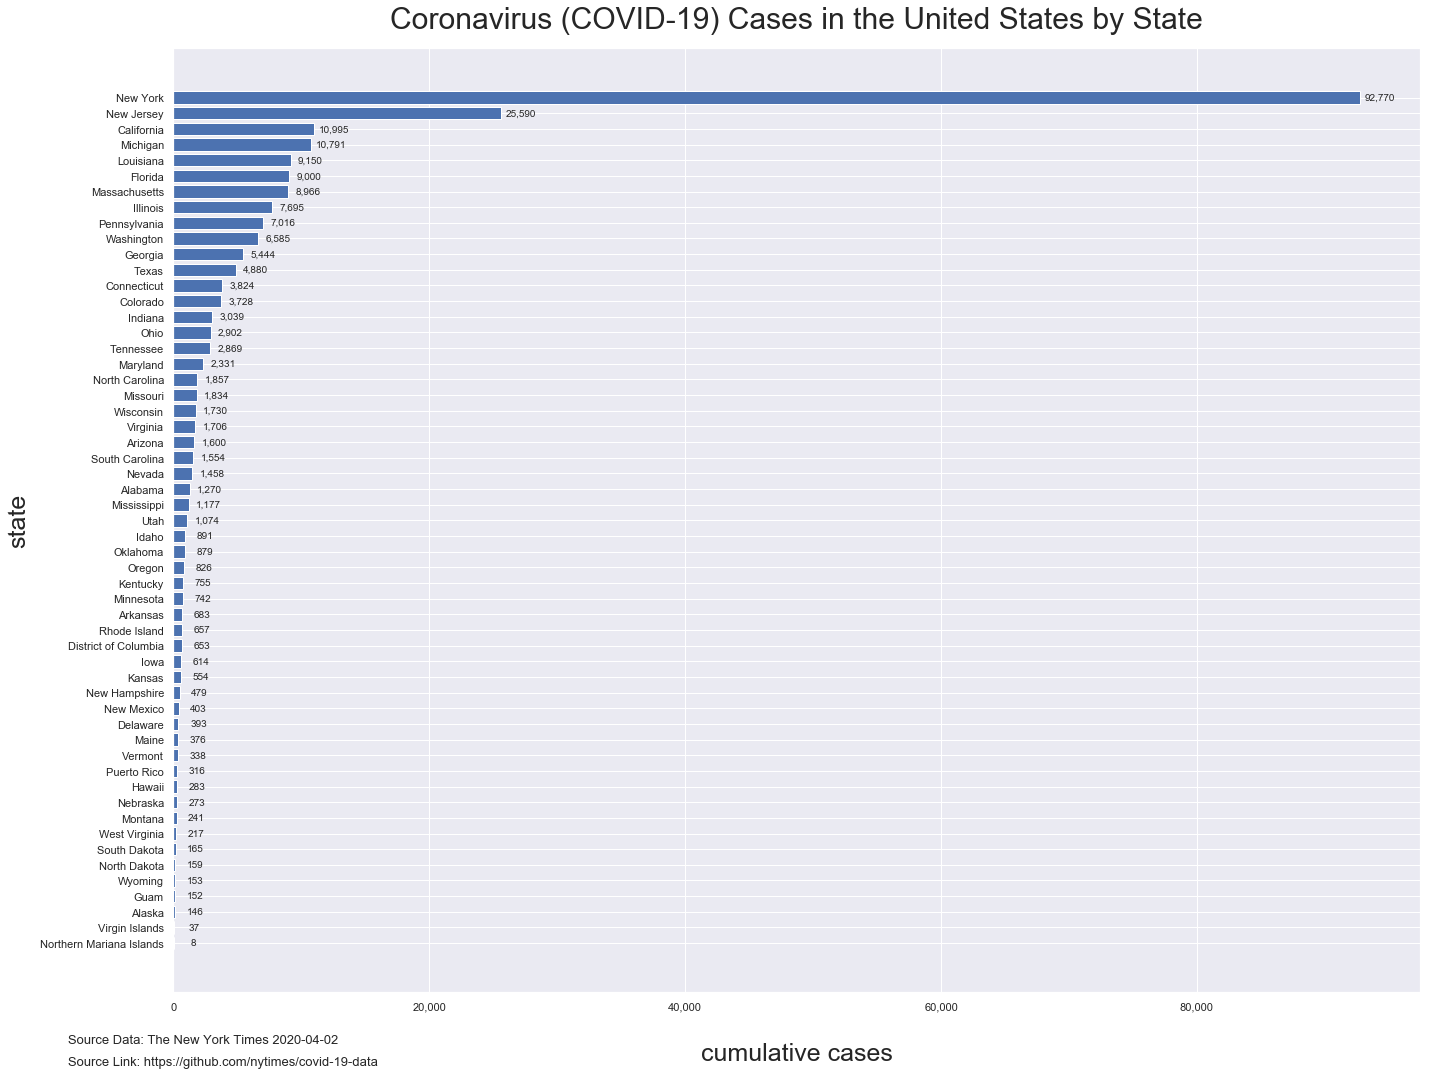

In [100]:
bar = state_current_cases.sort_values(by = 'cases', 
                    ascending=True)
bar.set_index('state', drop=False, inplace=True)

plt.subplots(figsize=(20,15))
ax = plt.subplot()

label_1 = ax.barh(bar.index, bar.cases)
plt.xlabel("cumulative cases", labelpad=14, fontsize=25)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.ylabel("state", labelpad=14, fontsize=25)
ax.xaxis.labelpad = 30
ax.yaxis.labelpad = 10

def autolabel_1(rects):
    for rect in rects:
        width = rect.get_width()
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{:,}'.format(width), 
                    xy=(width, yloc), 
                    xytext=(20, 0),
                    textcoords="offset points",
                    ha='center', va='center')
                
autolabel_1(label_1)

txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.03, txt, wrap=True, horizontalalignment='left', fontsize=13)
plt.figtext(0.05, 0.01, txt2, wrap=True, horizontalalignment='left', fontsize=13)

plt.title("Coronavirus (COVID-19) Cases in the United States by State", pad=20, fontsize=30)
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-barh')

# I have downloaded the shapefile already

In [101]:
#url = 'https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip'

# data_path = 'data'
# fullfilename = os.path.join(data_path, 'state_shape.gz')
# urllib.request.urlretrieve(url, fullfilename)

In [102]:
#file_path = 'data/state_shape.gz'

# items = zipfile.ZipFile(file_path)

# available files in the container
# print(items.namelist())

In [103]:
# opening Zip using 'with' keyword in read mode
# with zipfile.ZipFile(file_path, 'r') as file:
#     file.extractall(data_path)

In [104]:
states_shape = gpd.GeoDataFrame.from_file('data/cb_2018_us_state_500k.shp')

In [105]:
states_shape.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"(POLYGON ((-88.502966 30.215235, -88.491759 30..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"(POLYGON ((-75.72680699999999 35.935844, -75.7..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.002565 36.526588, -103.002188 3..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"(POLYGON ((-75.742406 37.80835, -75.741512 37...."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6431981036679 38.1690897960737, ..."


In [106]:
bar_drop_index = bar.reset_index(drop=True)

states_shape_cases = states_shape.merge(bar_drop_index, left_on='NAME', right_on='state')

In [107]:
states_shape_cases.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,date,state,fips,cases,deaths
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"(POLYGON ((-88.502966 30.215235, -88.491759 30...",2020-04-02,Mississippi,28,1177,26
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"(POLYGON ((-75.72680699999999 35.935844, -75.7...",2020-04-02,North Carolina,37,1857,17
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.002565 36.526588, -103.002188 3...",2020-04-02,Oklahoma,40,879,34
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"(POLYGON ((-75.742406 37.80835, -75.741512 37....",2020-04-02,Virginia,51,1706,41
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6431981036679 38.1690897960737, ...",2020-04-02,West Virginia,54,217,2


In [108]:
states_shape_cases.STUSPS.unique()

array(['MS', 'NC', 'OK', 'VA', 'WV', 'LA', 'MI', 'MA', 'ID', 'FL', 'NE',
       'WA', 'NM', 'PR', 'SD', 'TX', 'CA', 'AL', 'GA', 'PA', 'MO', 'CO',
       'UT', 'TN', 'WY', 'NY', 'KS', 'AK', 'NV', 'IL', 'VT', 'MT', 'IA',
       'SC', 'NH', 'AZ', 'DC', 'NJ', 'MD', 'ME', 'HI', 'DE', 'GU', 'RI',
       'KY', 'OH', 'WI', 'OR', 'ND', 'AR', 'IN', 'MN', 'CT'], dtype=object)

(-2259318.989842429,
 2743787.7776512564,
 -2259441.9737315555,
 874818.5571526419)

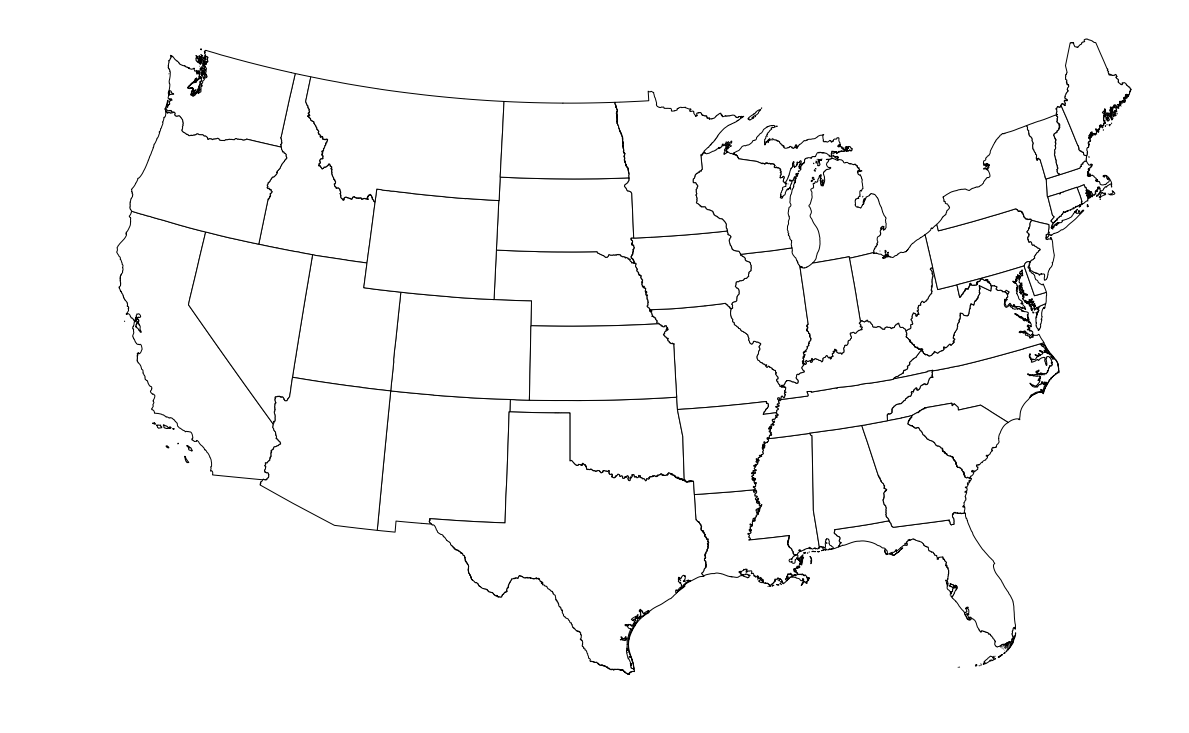

In [109]:
fig, ax = plt.subplots(figsize=(20,15))

delete_states = ['AK', 'HI', 'PR', 'GU']
states_shape_cases  = states_shape_cases.loc[~states_shape_cases['STUSPS'].isin(delete_states)]
states_shape_cases = states_shape_cases.to_crs(epsg=2163)

states_shape_cases.plot(ax=ax, color='w', edgecolor='black')

# Insert comment here
plt.axis('off')

In [110]:
states_shape_cases['point'] = states_shape_cases['geometry'].centroid
state_points = states_shape_cases[['point', 'NAME', 'cases']]
state_points = state_points.set_geometry('point')
state_points['coords'] = state_points['point'].apply(lambda x: x.representative_point().coords[:])
state_points['coords'] = [state_points[0] for state_points in state_points['coords']]

In [111]:
state_points.head()

,point,NAME,cases,coords
0,POINT (968900.5142401541 -1302349.006773153),Mississippi,1177,"(968900.5142401541, -1302349.0067731533)"
1,POINT (1849270.427707764 -820703.8884651705),North Carolina,1857,"(1849270.4277077643, -820703.8884651705)"
2,POINT (227351.7828779383 -1041651.468761091),Oklahoma,879,"(227351.7828779383, -1041651.4687610908)"
3,POINT (1846721.444074068 -594717.0352157739),Virginia,1706,"(1846721.4440740685, -594717.0352157739)"
4,POINT (1666480.709214782 -511066.3749840383),West Virginia,217,"(1666480.709214782, -511066.3749840383)"


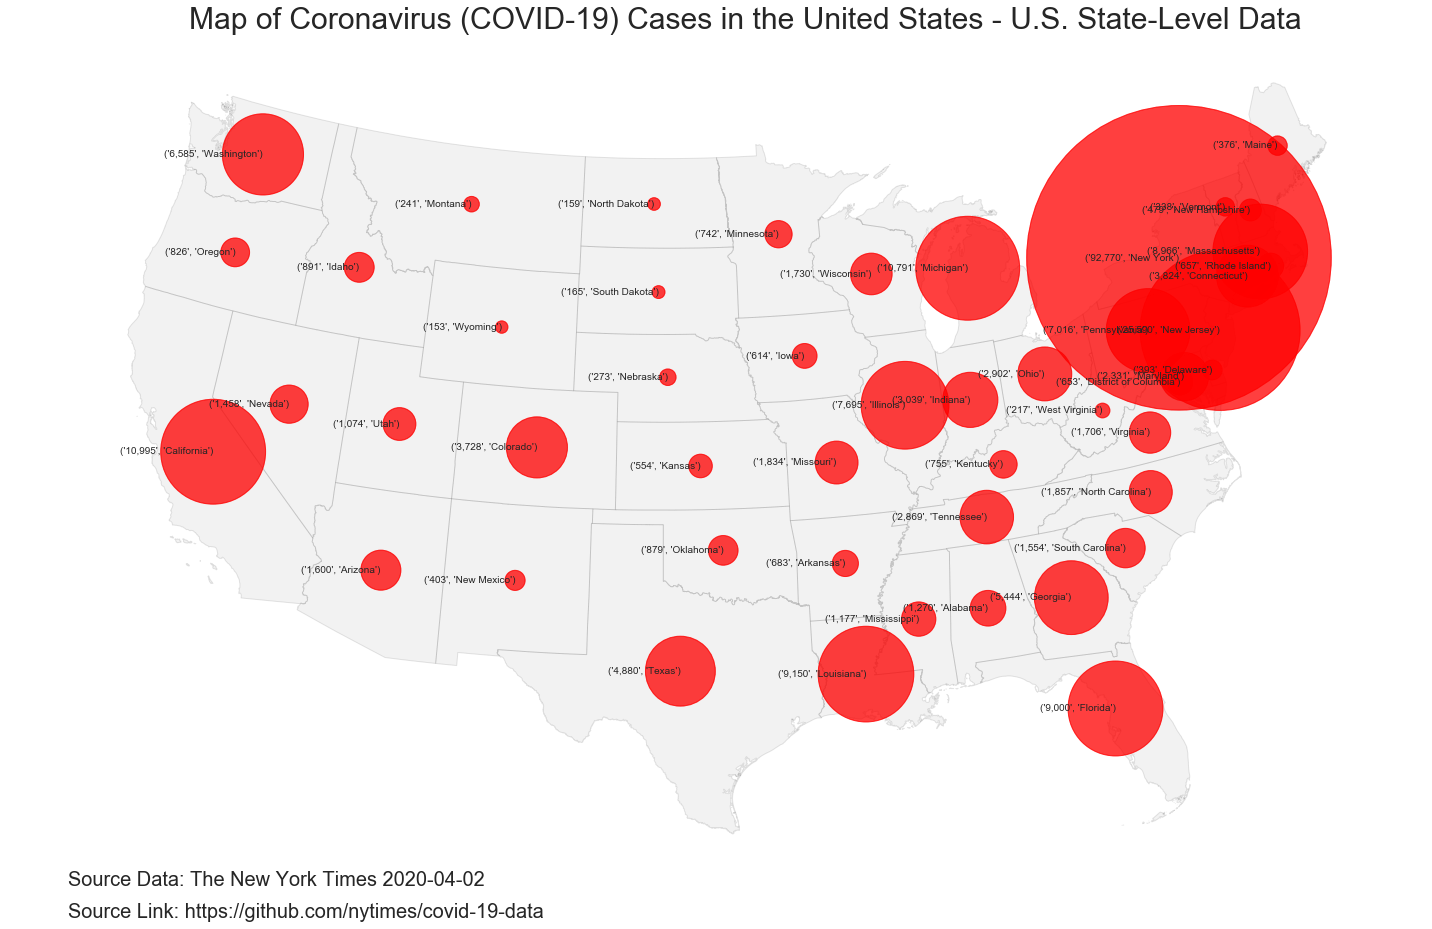

In [112]:
fig, ax = plt.subplots(figsize=(20,15))

states_shape_cases.plot(ax=ax, color='gray', edgecolor='black', alpha=.1)
state_points.plot(ax=ax, color='red', markersize=state_points['cases'], alpha=.5)

state_points.plot(ax=ax, color='red', markersize=state_points['cases'], alpha=.5)
for idx, row in state_points.iterrows():
    plt.annotate(s=('{:,}'.format(row['cases']), row['NAME']), xy=row['coords'],
                 horizontalalignment='right', va='center')
    
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
plt.figtext(0.05, 0.1, txt, wrap=True, horizontalalignment='left', fontsize=20)
plt.figtext(0.05, 0.07, txt2, wrap=True, horizontalalignment='left', fontsize=20)

ax.set_title('Map of Coronavirus (COVID-19) Cases in the United States - U.S. State-Level Data', fontsize=30)
plt.axis('off')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-state-map')

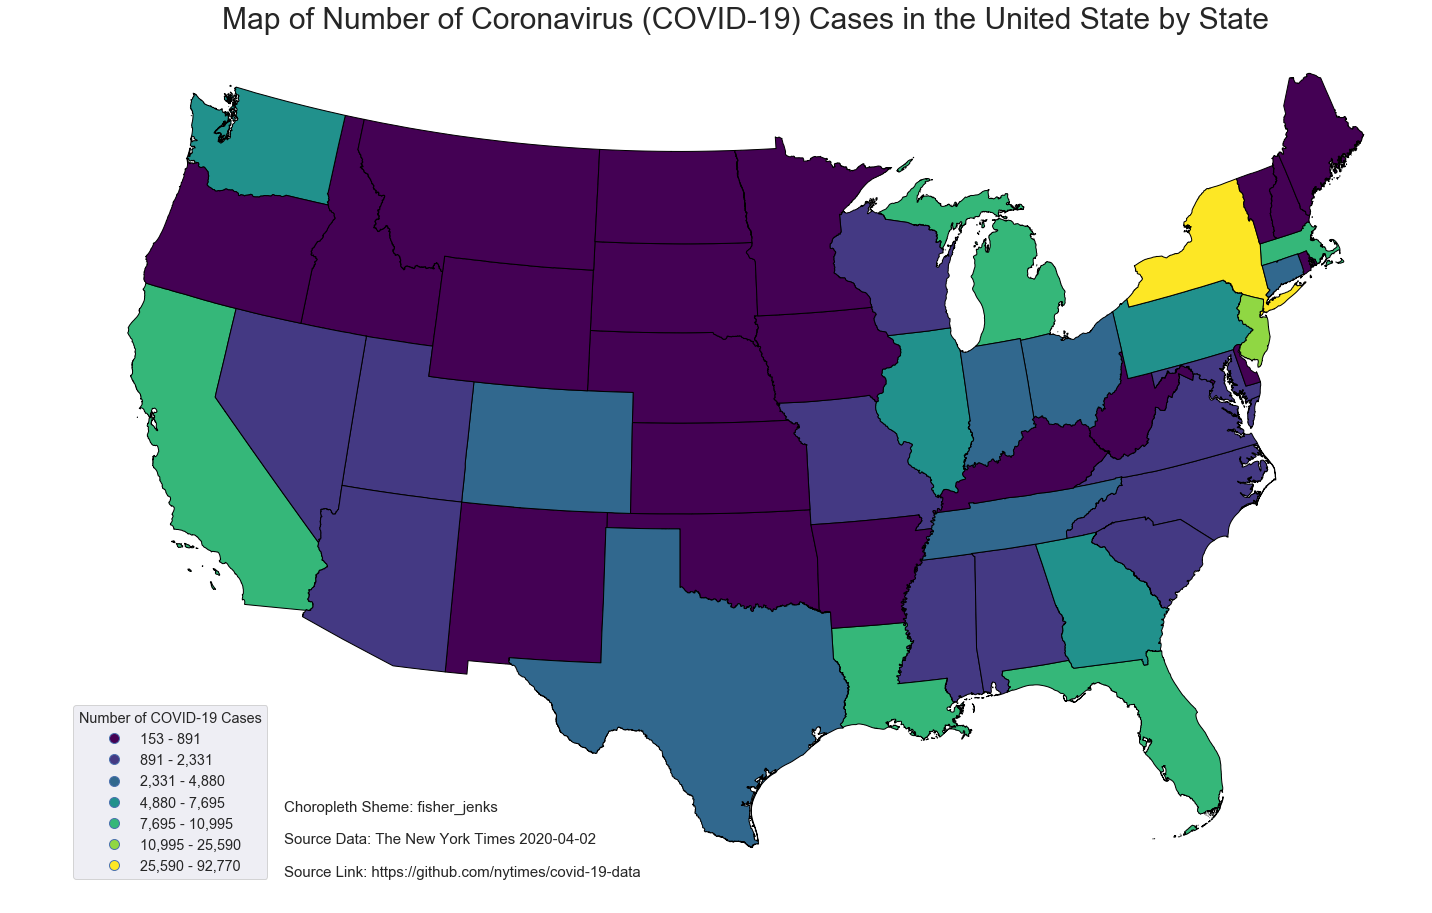

In [113]:
# defining our plot
plt.subplots(figsize=(20,15))
ax = plt.subplot()

fig = states_shape_cases.plot(column=("cases"), ax=ax, k=7, 
                   scheme='fisher_jenks', label=True, legend=True, 
                   legend_kwds={'loc': 'lower left', 'title': 'Number of COVID-19 Cases', 
                   'title_fontsize': 'x-large','fontsize': 'x-large'}, 
                   cmap='viridis', edgecolor='black')

ax.set_title("Map of Number of Coronavirus (COVID-19) Cases in the United State by State", fontsize=30)
txt = ('Source Data: The New York Times ' + current_date)
txt2 = ('Source Link: https://github.com/nytimes/covid-19-data')
txt3 = ('Choropleth Sheme: fisher_jenks')
plt.figtext(0.2, 0.145, txt, wrap=True, horizontalalignment='left', fontsize=15)
plt.figtext(0.2, 0.115, txt2, wrap=True, horizontalalignment='left', fontsize=15)
plt.figtext(0.2, 0.175, txt3, wrap=True, horizontalalignment='left', fontsize=15)

leg = fig.get_legend()
leg._loc = 3

for lbl in leg.get_texts():
    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)

plt.axis('off')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-state-map-choro')

In [114]:
bar.head()

,date,state,fips,cases,deaths
state,,,,,
Northern Mariana Islands,2020-04-02,Northern Mariana Islands,69,8,1
Virgin Islands,2020-04-02,Virgin Islands,78,37,0
Alaska,2020-04-02,Alaska,2,146,2
Guam,2020-04-02,Guam,66,152,3
Wyoming,2020-04-02,Wyoming,56,153,0


In [115]:
bar.dtypes

date      datetime64[ns]
state             object
fips               int64
cases              int64
deaths             int64
dtype: object

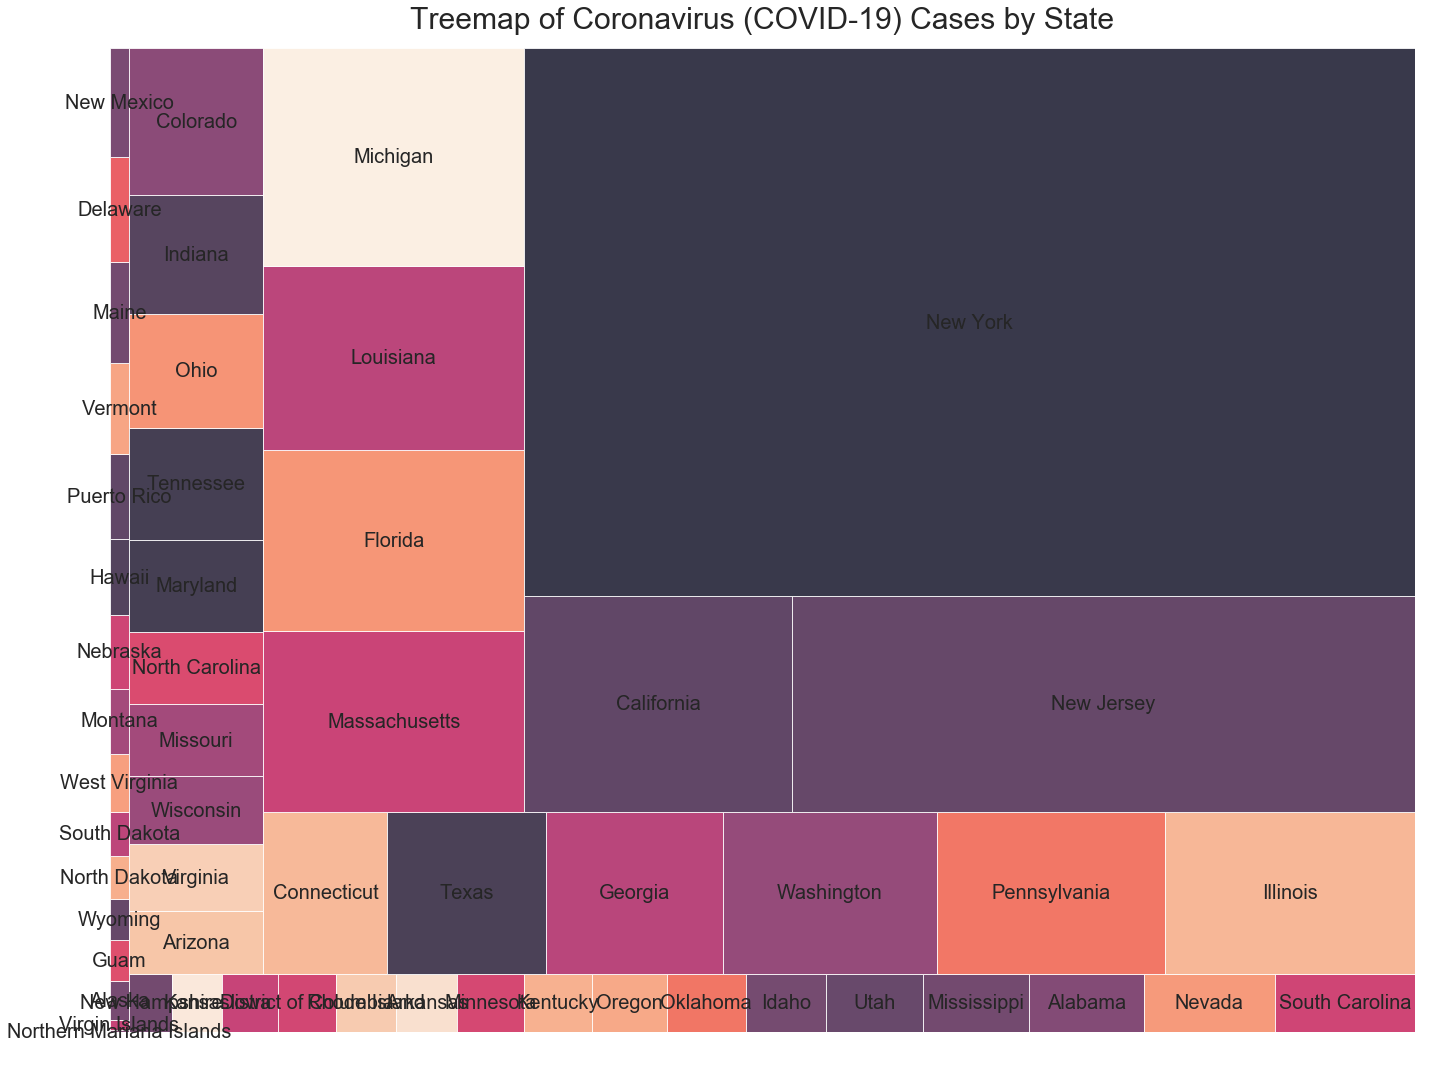

In [116]:
fig, ax = plt.subplots(figsize=(20,15))
squarify.plot(sizes=bar['cases'], label=bar['state'], alpha=.8, ax=ax, text_kwargs={'fontsize':20})
ax.set_title('Treemap of Coronavirus (COVID-19) Cases by State', fontsize=30, pad = 20)
ax.set_xlabel('Source Data: The New York Times' + current_date + 
              'n\Source Link: https://github.com/nytimes/covid-19-data', fontsize=10)
plt.axis('off')
plt.tight_layout()
plt.savefig('figures/nyt-covid-19-data-treemap')

In [117]:
covid_19_state_data.to_csv('data/us-states-raw-data.csv', index=False)
g.to_csv('data/us-states-grouped-day.csv')
bar.to_csv('data/us-states-grouped-states.csv')